In [1]:
# *Import libraries*
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.linear_model import LogisticRegression


#ANN
from keras.models import Sequential
from keras.layers import Dense, Dropout

import tensorflow as tf
from tensorflow import keras


## Importing FIFA 23 Players Dataset

In [2]:
Fifa = pd.read_csv('Fifa 23 Players Data.csv')
Fifa.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [3]:
pd.set_option('display.max_columns', None)
Fifa

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023.0,30.0,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023.0,9.0,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025.0,9.0,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025.0,17.0,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024.0,7.0,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,174,68,1287,274,Sligo Rovers,500,193000,RES,2022.0,20.0,2018,-,Right,3,2,1,-,-,-,-,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,49,50,50,50,50,50,51,50

In [4]:
## There are NULLS in columns I will drop afterwards
nan_cols = [i for i in Fifa.columns if Fifa[i].isnull().any()]
nan_cols

['Contract Until', 'Club Jersey Number']

As seen above, there are many features in the dataset. However, I will only use those that determine club's attributes, therefore I will make the AVG of each feature grouped by club.

In [5]:
## Removing features I won't use
Fifa = Fifa.drop(Fifa[['Known As','Value(in Euro)','Positions Played','Club Position','Nationality','Image Link','TotalStats','BaseStats','Wage(in Euro)','Height(in cm)','Weight(in kg)','Release Clause','Contract Until','Club Jersey Number','Dribbling','Joined On','On Loan','Preferred Foot','Weak Foot Rating','International Reputation','National Team Name','National Team Image Link','National Team Position','National Team Jersey Number','Curve','Long Shots','Penalties']], axis = 1)


In [6]:
Fifa.drop(Fifa.columns[-17:], inplace=True,axis=1)

In [7]:
Fifa.columns

Index(['Full Name', 'Overall', 'Potential', 'Best Position', 'Age',
       'Club Name', 'Skill Moves', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Composure', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeper Diving', 'Goalkeeper Handling',
       ' GoalkeeperKicking', 'Goalkeeper Positioning', 'Goalkeeper Reflexes'],
      dtype='object')

In [8]:
Fifa.columns = Fifa.columns.str.replace(' ', '')

In [9]:
Fifa.rename(columns={'BestPosition':'Position'}, inplace=True)

I want to simplify the Position column

In [10]:
map_position= {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'RB': 'Defender',
    'LB': 'Defender',
    'RWB': 'Defender',
    'LWB': 'Defender',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'ST': 'Forward',
    'CF': 'Forward',
    'RF': 'Forward',
    'LF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward'
}

In [11]:
Fifa['Position'].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [12]:
Fifa['Position'] = Fifa['Position'].map(map_position)


Then, Position looks like as follows:

In [13]:
Fifa['Position'].unique()

array(['Midfielder', 'Forward', 'Goalkeeper', 'Defender'], dtype=object)

**Are there any special characters in categorical features?**

In [14]:
Fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   FullName               18539 non-null  object
 1   Overall                18539 non-null  int64 
 2   Potential              18539 non-null  int64 
 3   Position               18539 non-null  object
 4   Age                    18539 non-null  int64 
 5   ClubName               18539 non-null  object
 6   SkillMoves             18539 non-null  int64 
 7   AttackingWorkRate      18539 non-null  object
 8   DefensiveWorkRate      18539 non-null  object
 9   PaceTotal              18539 non-null  int64 
 10  ShootingTotal          18539 non-null  int64 
 11  PassingTotal           18539 non-null  int64 
 12  DribblingTotal         18539 non-null  int64 
 13  DefendingTotal         18539 non-null  int64 
 14  PhysicalityTotal       18539 non-null  int64 
 15  Crossing           

In [15]:
cat_features = [col for col in Fifa.columns if Fifa[col].dtype == 'object' ]
cat_features

['FullName', 'Position', 'ClubName', 'AttackingWorkRate', 'DefensiveWorkRate']

In [16]:
Fifa[cat_features]

,FullName,Position,ClubName,AttackingWorkRate,DefensiveWorkRate
0,Lionel Messi,Midfielder,Paris Saint-Germain,Low,Low
1,Karim Benzema,Forward,Real Madrid CF,Medium,Medium
2,Robert Lewandowski,Forward,FC Barcelona,High,Medium
3,Kevin De Bruyne,Midfielder,Manchester City,High,High
4,Kylian Mbappé,Forward,Paris Saint-Germain,High,Low
...,...,...,...,...,...
18534,Darren Collins,Midfielder,Sligo Rovers,Medium,Medium
18535,Dejiang Yang,Midfielder,Guangzhou FC,Medium,Medium
18536,Liam Mullan,Midfielder,Derry City,High,Medium
18537,Daithí McCallion,Defender,Derry City,Medium,Medium


### Splitting the data into GoalKeeper & Other to make the analysis stronger (because I want to make feature averages, so if GK and others were together, their means wouldn't be significant )

In [17]:
Fifa['NewPosition'] = np.where(Fifa['Position'] == 'Goalkeeper', 'GK','Other')
Fifa

,FullName,Overall,Potential,Position,Age,ClubName,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,NewPosition
0,Lionel Messi,91,91,Midfielder,35,Paris Saint-Germain,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,93,90,93,87,76,91,92,95,86,68,70,68,44,40,93,94,96,20,35,24,6,11,15,14,8,Other
1,Karim Benzema,91,91,Forward,34,Real Madrid CF,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,73,76,91,79,80,78,92,72,87,79,82,82,63,39,92,89,90,43,24,18,13,11,5,5,7,Other
2,Robert Lewandowski,91,91,Forward,33,FC Barcelona,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,70,89,76,75,77,93,82,91,85,76,87,81,49,94,81,88,35,42,19,15,6,12,8,10,Other
3,Kevin De Bruyne,91,91,Midfielder,31,Manchester City,4,High,High,74,88,93,87,64,77,94,85,55,93,83,83,93,90,76,73,76,91,78,92,63,88,74,75,66,88,94,89,68,65,53,15,13,5,10,13,Other
4,Kylian Mbappé,91,95,Forward,23,Paris Saint-Germain,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,69,71,91,97,97,93,93,81,88,77,87,76,64,38,92,83,88,26,34,32,13,5,7,11,6,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,Midfielder,21,Sligo Rovers,2,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,33,48,69,68,59,44,63,50,45,32,31,37,22,50,52,47,39,29,27,6,9,5,13,8,Other
18535,Dejiang Yang,47,57,Midfielder,17,Guangzhou FC,2,Medium,Medium,55,37,41,47,48,39,34,33,44,46,31,31,45,46,52,57,59,51,80,50,55,34,35,52,46,35,40,45,46,50,52,6,12,11,8,6,Other
18536,Liam Mullan,47,67,Midfielder,18,Derry City,2,High,Medium,64,40,49,52,37,35,41,36,42,54,37,42,52,50,70,59,46,49,73,54,54,36,31,39,24,42,50,59,39,37,48,11,12,8,7,12,Other
18537,Daithí McCallion,47,61,Defender,17,Derry City,2,Medium,Medium,52,24,25,32,52,41,21,20,41,25,27,20,22,26,53,51,42,43,66,34,72,49,34,42,54,23,32,41,50,54,54,8,14,13,7,8,Other


In [18]:
GK = Fifa[Fifa['NewPosition'] == 'GK']
GK.columns

Index(['FullName', 'Overall', 'Potential', 'Position', 'Age', 'ClubName',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'FreekickAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GoalkeeperDiving',
       'GoalkeeperHandling', 'GoalkeeperKicking', 'GoalkeeperPositioning',
       'GoalkeeperReflexes', 'NewPosition'],
      dtype='object')

In [19]:
GK

,FullName,Overall,Potential,Position,Age,ClubName,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,NewPosition
6,Thibaut Courtois,90,91,Goalkeeper,30,Real Madrid CF,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,20,35,23,42,52,63,84,45,56,68,38,70,23,15,13,44,66,20,18,16,84,89,75,89,90,GK
7,Manuel Neuer,90,90,Goalkeeper,36,FC Bayern München,1,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,11,68,46,54,60,51,87,35,68,77,43,80,29,30,12,70,70,17,10,11,87,88,91,91,88,GK
14,Jan Oblak,89,91,Goalkeeper,29,Atlético de Madrid,1,Medium,Medium,86,90,78,89,49,87,13,11,15,43,13,14,40,30,43,58,65,87,49,59,77,41,78,34,21,11,65,68,27,12,18,86,90,78,87,89,GK
16,Ederson Santana de Moraes,89,91,Goalkeeper,28,Manchester City,1,Medium,Medium,87,82,93,88,64,88,20,14,14,61,18,20,66,40,64,63,60,88,48,70,66,41,78,38,27,20,70,70,29,15,8,87,82,93,88,88,GK
18,Alisson Ramses Becker,89,90,Goalkeeper,29,Liverpool,1,Medium,Medium,86,85,85,89,54,90,17,13,29,60,20,18,58,40,58,49,40,87,37,64,52,32,78,27,11,13,66,68,15,19,16,86,85,85,90,89,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18508,Lalbiakhlua Jongte,48,60,Goalkeeper,19,Hyderabad FC,1,Medium,Medium,49,47,48,47,18,49,13,8,10,30,7,13,28,14,18,18,30,42,44,36,56,25,50,20,12,5,32,30,9,14,11,49,47,48,49,47,GK
18515,Xiang Gao,48,54,Goalkeeper,21,Wuhan FC,1,Medium,Medium,46,49,51,51,24,48,13,8,12,14,7,17,14,9,26,22,32,32,43,38,54,22,56,22,18,16,29,33,12,15,16,46,49,51,48,51,GK
18520,Nikhil Deka,48,61,Goalkeeper,19,NorthEast United FC,1,Medium,Medium,47,50,52,51,32,47,11,9,12,18,8,14,18,17,32,32,26,32,42,39,61,28,42,19,11,7,30,31,9,14,10,47,50,52,47,51,GK
18521,Vishal Yadav,48,62,Goalkeeper,20,Jamshedpur FC,1,Medium,Medium,45,47,46,52,20,48,13,8,13,37,5,13,31,14,18,23,31,40,44,35,57,16,38,26,12,8,39,26,7,12,13,45,47,46,48,52,GK


I then need to drop columns unrelated with GK

In [20]:
GK_features = [i for i in GK.columns if "Goalkeeper" in i]
GK_features

['GoalkeeperDiving',
 'GoalkeeperHandling',
 'GoalkeeperKicking',
 'GoalkeeperPositioning',
 'GoalkeeperReflexes']

In [21]:
GK_features2 = ['ClubName']
GK_features2.extend(GK_features)
GK_features2

['ClubName',
 'GoalkeeperDiving',
 'GoalkeeperHandling',
 'GoalkeeperKicking',
 'GoalkeeperPositioning',
 'GoalkeeperReflexes']

In [22]:
GK = GK[GK_features2]
GK

,ClubName,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes
6,Real Madrid CF,84,89,75,89,90
7,FC Bayern München,87,88,91,91,88
14,Atlético de Madrid,86,90,78,87,89
16,Manchester City,87,82,93,88,88
18,Liverpool,86,85,85,90,89
...,...,...,...,...,...,...
18508,Hyderabad FC,49,47,48,49,47
18515,Wuhan FC,46,49,51,48,51
18520,NorthEast United FC,47,50,52,47,51
18521,Jamshedpur FC,45,47,46,48,52


I need to group the Goalkeepers by GKClubName.

In [23]:
GKClubs = GK.groupby("ClubName").mean().sort_values("ClubName", ascending = False)
GKClubs

,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes
ClubName,,,,,
Śląsk Wrocław,60.750000,57.750000,58.250000,59.250000,61.250000
İttifak Holding Konyaspor,66.500000,66.500000,63.500000,65.000000,68.000000
İstanbulspor,56.333333,56.000000,51.000000,55.666667,63.333333
İstanbul Başakşehir FK,70.000000,66.500000,64.000000,71.000000,70.000000
Ümraniyespor,61.333333,59.000000,53.333333,58.333333,60.666667
...,...,...,...,...,...
1. FC Nürnberg,66.666667,64.333333,60.000000,65.000000,66.666667
1. FC Magdeburg,66.666667,64.000000,65.666667,65.000000,65.000000
1. FC Köln,67.750000,66.250000,60.750000,63.000000,68.500000


Same procedure for not Goalkeepers

In [24]:
NotGK = Fifa
NotGK

,FullName,Overall,Potential,Position,Age,ClubName,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,NewPosition
0,Lionel Messi,91,91,Midfielder,35,Paris Saint-Germain,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,93,90,93,87,76,91,92,95,86,68,70,68,44,40,93,94,96,20,35,24,6,11,15,14,8,Other
1,Karim Benzema,91,91,Forward,34,Real Madrid CF,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,73,76,91,79,80,78,92,72,87,79,82,82,63,39,92,89,90,43,24,18,13,11,5,5,7,Other
2,Robert Lewandowski,91,91,Forward,33,FC Barcelona,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,70,89,76,75,77,93,82,91,85,76,87,81,49,94,81,88,35,42,19,15,6,12,8,10,Other
3,Kevin De Bruyne,91,91,Midfielder,31,Manchester City,4,High,High,74,88,93,87,64,77,94,85,55,93,83,83,93,90,76,73,76,91,78,92,63,88,74,75,66,88,94,89,68,65,53,15,13,5,10,13,Other
4,Kylian Mbappé,91,95,Forward,23,Paris Saint-Germain,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,69,71,91,97,97,93,93,81,88,77,87,76,64,38,92,83,88,26,34,32,13,5,7,11,6,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,Midfielder,21,Sligo Rovers,2,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,33,48,69,68,59,44,63,50,45,32,31,37,22,50,52,47,39,29,27,6,9,5,13,8,Other
18535,Dejiang Yang,47,57,Midfielder,17,Guangzhou FC,2,Medium,Medium,55,37,41,47,48,39,34,33,44,46,31,31,45,46,52,57,59,51,80,50,55,34,35,52,46,35,40,45,46,50,52,6,12,11,8,6,Other
18536,Liam Mullan,47,67,Midfielder,18,Derry City,2,High,Medium,64,40,49,52,37,35,41,36,42,54,37,42,52,50,70,59,46,49,73,54,54,36,31,39,24,42,50,59,39,37,48,11,12,8,7,12,Other
18537,Daithí McCallion,47,61,Defender,17,Derry City,2,Medium,Medium,52,24,25,32,52,41,21,20,41,25,27,20,22,26,53,51,42,43,66,34,72,49,34,42,54,23,32,41,50,54,54,8,14,13,7,8,Other


I'll encode AttackingWorkRate & DefensiveWorkRate. Both LabelEncoder and OrdinalEncoder will start counting by alphabetical order. So, as I want them to be {'low':0,'medium':1,'high':2}, I'll map those values


In [25]:
print(NotGK['AttackingWorkRate'].unique())
print(NotGK['DefensiveWorkRate'].unique())

['Low' 'Medium' 'High']
['Low' 'Medium' 'High']


In [26]:
m = {'Low':0,'Medium':1,'High':2}
NotGK['AttackingWorkRate'] = NotGK['AttackingWorkRate'].map(m)
NotGK['DefensiveWorkRate'] = NotGK['DefensiveWorkRate'].map(m)

NotGK

,FullName,Overall,Potential,Position,Age,ClubName,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,NewPosition
0,Lionel Messi,91,91,Midfielder,35,Paris Saint-Germain,4,0,0,81,89,90,94,34,64,84,90,70,91,88,93,90,93,87,76,91,92,95,86,68,70,68,44,40,93,94,96,20,35,24,6,11,15,14,8,Other
1,Karim Benzema,91,91,Forward,34,Real Madrid CF,4,1,1,80,88,83,87,39,78,75,92,90,89,88,73,76,91,79,80,78,92,72,87,79,82,82,63,39,92,89,90,43,24,18,13,11,5,5,7,Other
2,Robert Lewandowski,91,91,Forward,33,FC Barcelona,4,2,1,75,91,79,86,44,83,71,94,91,84,89,85,70,89,76,75,77,93,82,91,85,76,87,81,49,94,81,88,35,42,19,15,6,12,8,10,Other
3,Kevin De Bruyne,91,91,Midfielder,31,Manchester City,4,2,2,74,88,93,87,64,77,94,85,55,93,83,83,93,90,76,73,76,91,78,92,63,88,74,75,66,88,94,89,68,65,53,15,13,5,10,13,Other
4,Kylian Mbappé,91,95,Forward,23,Paris Saint-Germain,5,2,0,97,89,80,92,36,76,78,93,72,85,83,69,71,91,97,97,93,93,81,88,77,87,76,64,38,92,83,88,26,34,32,13,5,7,11,6,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,Midfielder,21,Sligo Rovers,2,1,1,68,48,43,51,31,33,40,49,30,42,48,50,33,48,69,68,59,44,63,50,45,32,31,37,22,50,52,47,39,29,27,6,9,5,13,8,Other
18535,Dejiang Yang,47,57,Midfielder,17,Guangzhou FC,2,1,1,55,37,41,47,48,39,34,33,44,46,31,31,45,46,52,57,59,51,80,50,55,34,35,52,46,35,40,45,46,50,52,6,12,11,8,6,Other
18536,Liam Mullan,47,67,Midfielder,18,Derry City,2,2,1,64,40,49,52,37,35,41,36,42,54,37,42,52,50,70,59,46,49,73,54,54,36,31,39,24,42,50,59,39,37,48,11,12,8,7,12,Other
18537,Daithí McCallion,47,61,Defender,17,Derry City,2,1,1,52,24,25,32,52,41,21,20,41,25,27,20,22,26,53,51,42,43,66,34,72,49,34,42,54,23,32,41,50,54,54,8,14,13,7,8,Other


In [27]:
NotGK = NotGK.drop('FullName', axis= 1)
NotGK = NotGK.drop(axis = 1, labels = NotGK[GK_features])
NotGK

,Overall,Potential,Position,Age,ClubName,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle,NewPosition
0,91,91,Midfielder,35,Paris Saint-Germain,4,0,0,81,89,90,94,34,64,84,90,70,91,88,93,90,93,87,76,91,92,95,86,68,70,68,44,40,93,94,96,20,35,24,Other
1,91,91,Forward,34,Real Madrid CF,4,1,1,80,88,83,87,39,78,75,92,90,89,88,73,76,91,79,80,78,92,72,87,79,82,82,63,39,92,89,90,43,24,18,Other
2,91,91,Forward,33,FC Barcelona,4,2,1,75,91,79,86,44,83,71,94,91,84,89,85,70,89,76,75,77,93,82,91,85,76,87,81,49,94,81,88,35,42,19,Other
3,91,91,Midfielder,31,Manchester City,4,2,2,74,88,93,87,64,77,94,85,55,93,83,83,93,90,76,73,76,91,78,92,63,88,74,75,66,88,94,89,68,65,53,Other
4,91,95,Forward,23,Paris Saint-Germain,5,2,0,97,89,80,92,36,76,78,93,72,85,83,69,71,91,97,97,93,93,81,88,77,87,76,64,38,92,83,88,26,34,32,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,56,Midfielder,21,Sligo Rovers,2,1,1,68,48,43,51,31,33,40,49,30,42,48,50,33,48,69,68,59,44,63,50,45,32,31,37,22,50,52,47,39,29,27,Other
18535,47,57,Midfielder,17,Guangzhou FC,2,1,1,55,37,41,47,48,39,34,33,44,46,31,31,45,46,52,57,59,51,80,50,55,34,35,52,46,35,40,45,46,50,52,Other
18536,47,67,Midfielder,18,Derry City,2,2,1,64,40,49,52,37,35,41,36,42,54,37,42,52,50,70,59,46,49,73,54,54,36,31,39,24,42,50,59,39,37,48,Other
18537,47,61,Defender,17,Derry City,2,1,1,52,24,25,32,52,41,21,20,41,25,27,20,22,26,53,51,42,43,66,34,72,49,34,42,54,23,32,41,50,54,54,Other


In [28]:
NotGKClubs = NotGK.groupby("ClubName").mean().sort_values("Overall", ascending = False)
NotGKClubs

C:\Users\User\AppData\Local\Temp\ipykernel_17056\4161156375.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NotGKClubs = NotGK.groupby("ClubName").mean().sort_values("Overall", ascending = False)


,Overall,Potential,Age,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
ClubName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FC Bayern München,80.590909,84.727273,25.454545,2.954545,1.409091,1.090909,77.727273,69.000000,73.909091,78.409091,60.454545,73.318182,65.272727,59.772727,62.318182,73.954545,56.272727,49.590909,67.772727,72.818182,73.181818,72.863636,72.318182,78.590909,70.727273,72.545455,72.272727,70.727273,71.818182,63.636364,57.000000,63.954545,69.409091,73.045455,56.045455,57.590909,55.272727
Paris Saint-Germain,79.807692,84.230769,25.807692,3.038462,1.384615,1.192308,76.076923,67.500000,73.153846,78.500000,60.384615,70.307692,60.923077,55.846154,57.346154,71.115385,51.153846,51.807692,66.461538,70.807692,71.615385,70.461538,71.961538,77.384615,68.576923,70.615385,68.269231,66.961538,67.769231,61.769231,57.307692,62.692308,70.461538,75.192308,54.230769,56.384615,52.346154
Inter,79.730769,82.653846,27.884615,2.653846,1.230769,1.269231,74.769231,64.692308,70.846154,75.423077,66.153846,75.115385,61.192308,54.461538,65.461538,71.000000,53.884615,50.076923,68.346154,70.961538,69.807692,71.884615,66.653846,77.884615,65.038462,68.307692,70.615385,71.538462,72.884615,68.576923,63.346154,59.076923,66.153846,76.384615,62.807692,62.653846,60.076923
Liverpool,78.666667,83.600000,25.666667,3.033333,1.466667,1.400000,73.966667,63.700000,71.866667,76.066667,62.966667,71.466667,62.866667,54.400000,57.533333,72.433333,51.500000,52.166667,68.933333,71.833333,71.166667,70.733333,71.033333,77.133333,70.300000,68.500000,67.600000,71.100000,68.533333,66.833333,60.633333,61.900000,68.633333,75.266667,58.766667,62.066667,57.166667
Manchester City,78.518519,84.185185,25.370370,2.925926,1.518519,1.333333,73.629630,65.259259,72.148148,76.296296,62.259259,70.703704,61.777778,56.481481,56.518519,72.037037,52.740741,56.555556,67.407407,72.185185,71.037037,70.592593,70.185185,76.370370,71.703704,71.148148,66.407407,69.851852,68.407407,64.962963,58.518519,61.222222,69.296296,72.925926,59.259259,60.185185,55.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Finn Harps,55.520000,59.680000,25.720000,2.000000,1.400000,1.360000,59.520000,41.880000,46.120000,51.640000,44.000000,60.000000,38.160000,33.520000,46.000000,46.320000,31.400000,33.680000,40.000000,46.720000,57.360000,56.520000,55.760000,50.800000,56.480000,46.400000,61.760000,56.880000,61.920000,52.600000,40.120000,41.640000,43.000000,49.080000,40.440000,41.880000,39.600000
Drogheda United,55.074074,59.000000,23.925926,2.000000,1.111111,1.037037,56.777778,46.185185,47.740741,51.703704,44.185185,57.444444,40.518519,41.000000,46.481481,48.629630,38.000000,38.666667,44.148148,46.629630,54.296296,53.777778,53.444444,51.259259,57.592593,48.185185,57.814815,53.296296,58.851852,52.074074,40.888889,43.925926,46.666667,47.851852,41.111111,43.148148,41.333333
UCD AFC,54.409091,61.227273,20.954545,2.045455,0.909091,1.045455,60.545455,46.363636,48.318182,51.409091,43.863636,57.909091,40.818182,43.954545,45.454545,50.636364,37.954545,41.454545,45.909091,47.590909,59.636364,60.409091,59.954545,52.545455,61.136364,45.500000,61.681818,60.500000,60.727273,48.363636,39.818182,45.590909,48.000000,49.500000,40.909091,41.318182,40.227273


Time to merge GKClubs and NotGKClubs datasets by ClubName

In [29]:
Fifa_teams = NotGKClubs.merge(GKClubs,how='left', on='ClubName').reset_index()
Fifa_teams

,ClubName,Overall,Potential,Age,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes
0,FC Bayern München,80.590909,84.727273,25.454545,2.954545,1.409091,1.090909,77.727273,69.000000,73.909091,78.409091,60.454545,73.318182,65.272727,59.772727,62.318182,73.954545,56.272727,49.590909,67.772727,72.818182,73.181818,72.863636,72.318182,78.590909,70.727273,72.545455,72.272727,70.727273,71.818182,63.636364,57.000000,63.954545,69.409091,73.045455,56.045455,57.590909,55.272727,72.666667,70.333333,72.333333,74.333333,76.666667
1,Paris Saint-Germain,79.807692,84.230769,25.807692,3.038462,1.384615,1.192308,76.076923,67.500000,73.153846,78.500000,60.384615,70.307692,60.923077,55.846154,57.346154,71.115385,51.153846,51.807692,66.461538,70.807692,71.615385,70.461538,71.961538,77.384615,68.576923,70.615385,68.269231,66.961538,67.769231,61.769231,57.307692,62.692308,70.461538,75.192308,54.230769,56.384615,52.346154,80.750000,76.500000,72.250000,77.500000,82.500000
2,Inter,79.730769,82.653846,27.884615,2.653846,1.230769,1.269231,74.769231,64.692308,70.846154,75.423077,66.153846,75.115385,61.192308,54.461538,65.461538,71.000000,53.884615,50.076923,68.346154,70.961538,69.807692,71.884615,66.653846,77.884615,65.038462,68.307692,70.615385,71.538462,72.884615,68.576923,63.346154,59.076923,66.153846,76.384615,62.807692,62.653846,60.076923,76.000000,77.000000,71.000000,80.666667,80.666667
3,Liverpool,78.666667,83.600000,25.666667,3.033333,1.466667,1.400000,73.966667,63.700000,71.866667,76.066667,62.966667,71.466667,62.866667,54.400000,57.533333,72.433333,51.500000,52.166667,68.933333,71.833333,71.166667,70.733333,71.033333,77.133333,70.300000,68.500000,67.600000,71.100000,68.533333,66.833333,60.633333,61.900000,68.633333,75.266667,58.766667,62.066667,57.166667,77.000000,75.333333,75.333333,76.333333,79.666667
4,Manchester City,78.518519,84.185185,25.370370,2.925926,1.518519,1.333333,73.629630,65.259259,72.148148,76.296296,62.259259,70.703704,61.777778,56.481481,56.518519,72.037037,52.740741,56.555556,67.407407,72.185185,71.037037,70.592593,70.185185,76.370370,71.703704,71.148148,66.407407,69.851852,68.407407,64.962963,58.518519,61.222222,69.296296,72.925926,59.259259,60.185185,55.777778,75.333333,73.666667,80.333333,79.000000,78.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Finn Harps,55.520000,59.680000,25.720000,2.000000,1.400000,1.360000,59.520000,41.880000,46.120000,51.640000,44.000000,60.000000,38.160000,33.520000,46.000000,46.320000,31.400000,33.680000,40.000000,46.720000,57.360000,56.520000,55.760000,50.800000,56.480000,46.400000,61.760000,56.880000,61.920000,52.600000,40.120000,41.640000,43.000000,49.080000,40.440000,41.880000,39.600000,57.666667,55.000000,56.000000,56.000000,60.000000
675,Drogheda United,55.074074,59.000000,23.925926,2.000000,1.111111,1.037037,56.777778,46.185185,47.740741,51.703704,44.185185,57.444444,40.518519,41.000000,46.481481,48.629630,38.000000,38.666667,44.148148,46.629630,54.296296,53.777778,53.444444,51.259259,57.592593,48.185185,57.814815,53.296296,58.851852,52.074074,40.888889,43.925926,46.666667,47.851852,41.111111,43.148148,41.333333,56.666667,54.333333,52.333333,55.333333,55.333333
676,UCD AFC,54.409091,61.227273,20.954545,2.045455,0.909091,1.045455,60.545455,46.363636,48.318182,51.409091,43.863636,57.909091,40.818182,43.954545,45.454545,50.636364,37.954545,41.454545,45.909091,47.590909,59.636364,60.409091,59.954545,52.545455,61.136364

In [30]:
Betis = Fifa_teams.query("ClubName == 'Real Betis Balompié'")
Betis

,ClubName,Overall,Potential,Age,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,Aggression,Interceptions,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes
36,Real Betis Balompié,74.0,78.387097,26.870968,2.741935,1.387097,1.0,67.096774,63.967742,66.548387,70.83871,53.322581,65.806452,57.290323,57.322581,58.0,68.483871,49.870968,50.483871,61.387097,68.419355,64.387097,63.83871,63.903226,70.193548,61.903226,66.83871,61.806452,61.354839,65.516129,59.935484,49.774194,60.677419,63.870968,65.580645,49.193548,50.677419,48.612903,75.666667,74.333333,75.666667,75.666667,77.333333


***
## Importing League Datasets

In [31]:
uk = pd.read_csv('LeagueEng.csv')
sp = pd.read_csv('LeagueSpa.csv')
it = pd.read_csv('LeagueItal.csv')
ge = pd.read_csv('LeagueGerm.csv')
be = pd.read_csv('LeagueBelg.csv')
fr = pd.read_csv('LeagueFran.csv')
ne = pd.read_csv('LeagueNether.csv')
pt = pd.read_csv('LeaguePort.csv')
tr = pd.read_csv('LeagueTurk.csv')

Importing Club Dictionaries

In [32]:
xls = pd.ExcelFile('Dict.xlsx')

uk_dict = pd.read_excel(xls,'Eng')
sp_dict = pd.read_excel(xls,'Spa')
it_dict = pd.read_excel(xls,'Ita')
ge_dict = pd.read_excel(xls,'Ger')
be_dict = pd.read_excel(xls,'Bel')
fr_dict = pd.read_excel(xls,'Fra')
ne_dict = pd.read_excel(xls,'Net')
pt_dict = pd.read_excel(xls,'Por')
tr_dict = pd.read_excel(xls,'Tur')

In [33]:
uk_dict

,Team,TeamDest
0,Arsenal,Arsenal
1,Aston Villa,Aston Villa
2,Brentford,Brentford
3,Brighton,Brighton & Hove Albion
4,Burnley,Burnley
5,Chelsea,Chelsea
6,Crystal Palace,Crystal Palace
7,Everton,Everton
8,Leeds,Leeds United
9,Leicester,Leicester City


### Mapping ClubNames 

In [34]:
## Spain
sp = pd.merge(sp_dict, sp, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
sp = pd.merge(sp_dict, sp, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

## UK
uk = pd.merge(uk_dict, uk, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
uk = pd.merge(uk_dict, uk, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Italy
it = pd.merge(it_dict, it, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
it = pd.merge(it_dict, it, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Germany
ge = pd.merge(ge_dict, ge, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
ge = pd.merge(ge_dict, ge, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Belgium
be = pd.merge(be_dict, be, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
be = pd.merge(be_dict, be, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## France
fr = pd.merge(fr_dict, fr, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
fr = pd.merge(fr_dict, fr, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Netherlands
ne = pd.merge(ne_dict, ne, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
ne = pd.merge(ne_dict, ne, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Portugal
pt = pd.merge(pt_dict, pt, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
pt = pd.merge(pt_dict, pt, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])

# ## Turkey
tr = pd.merge(tr_dict, tr, 'right', left_on='Team', right_on= 'HomeTeam').drop(columns = ['Team'])
tr = pd.merge(tr_dict, tr, 'right', left_on='Team', right_on= 'AwayTeam').drop(columns = ['Team'])


## Combining all Leagues together

In [35]:
allres = uk.append([be,ge,tr,sp,ne,fr,pt,it])
allres['Div'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_17056\3100187439.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allres = uk.append([be,ge,tr,sp,ne,fr,pt,it])


array(['E0', 'B1', 'D1', 'T1', 'SP1', 'N1', 'F1', 'P1', 'I1'],
      dtype=object)

In [36]:
allres

,TeamDest_x,TeamDest_y,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Unnamed: 105
0,Arsenal,Brentford,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1.0,0.0,H,M Oliver,8.0,22.0,3.0,4.0,12.0,8.0,2.0,5.0,0.0,0.0,0.0,0.0,4.00,3.40,1.95,4.00,3.50,1.95,3.80,3.40,2.05,4.05,3.46,2.05,4.00,3.40,1.90,4.10,3.40,2.00,4.62,3.72,2.10,4.02,3.43,2.02,2.10,1.72,2.22,1.73,2.26,1.83,2.16,1.73,0.50,1.86,2.07,1.88,2.06,2.05,2.08,1.87,2.03,3.80,3.25,2.05,3.80,3.30,2.05,3.80,3.25,2.10,3.94,3.33,2.13,3.90,3.00,2.05,3.90,3.25,2.10,4.20,3.50,2.18,3.89,3.28,2.10,2.37,1.57,2.44,1.62,2.47,1.75,2.33,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09,NaN
1,Leeds United,Manchester United,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1.0,0.0,H,P Tierney,16.0,10.0,8.0,3.0,11.0,9.0,5.0,4.0,1.0,2.0,0.0,0.0,1.53,4.50,5.75,1.53,4.50,5.75,1.55,4.40,5.75,1.56,4.57,5.96,1.52,4.33,5.80,1.55,4.40,6.00,1.59,4.65,6.35,1.55,4.48,5.87,1.61,2.30,1.67,2.32,1.71,2.38,1.65,2.29,-1.00,1.95,1.98,1.96,1.96,2.00,2.01,1.93,1.96,1.61,4.20,5.25,1.62,4.10,5.25,1.65,4.20,4.90,1.67,4.20,5.40,1.57,4.20,5.50,1.65,4.10,5.25,1.71,4.33,5.80,1.64,4.19,5.22,1.66,2.20,1.70,2.27,1.75,2.37,1.67,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79,NaN
2,Brighton & Hove Albion,Burnley,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1.0,0.0,H,D Coote,14.0,14.0,3.0,8.0,10.0,7.0,7.0,6.0,2.0,1.0,0.0,0.0,3.10,3.10,2.45,3.20,3.10,2.40,3.15,3.05,2.45,3.30,3.12,2.51,3.20,3.00,2.45,3.13,3.10,2.45,3.33,3.20,2.60,3.19,3.09,2.49,2.50,1.53,2.56,1.56,2.56,1.63,2.46,1.57,0.25,1.80,2.14,1.83,2.12,1.83,2.17,1.79,2.12,3.10,3.10,2.45,3.25,3.10,2.40,3.10,3.05,2.45,3.27,3.14,2.51,3.10,3.00,2.45,3.13,3.13,2.50,3.35,3.20,2.56,3.19,3.10,2.48,2.30,1.61,2.33,1.67,2.42,1.71,2.34,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12,NaN
3,Crystal Palace,Chelsea,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2.0,0.0,H,J Moss,13.0,4.0,6.0,1.0,15.0,11.0,5.0,2.0,0.0,0.0,0.0,0.0,1.25,5.75,13.00,1.28,5.75,10.50,1.25,6.00,13.00,1.26,6.24,12.74,1.25,5.50,13.00,1.25,5.75,13.00,1.30,6.30,15.00,1.26,5.92,12.80,1.80,2.00,1.80,2.09,1.84,2.12,1.79,2.06,-1.50,1.84,2.09,1.79,2.12,1.93,2.12,1.83,2.07,1.30,5.25,11.00,1.33,5.00,10.00,1.30,5.25,11.00,1.34,5.40,11.00,1.30,5.25,10.00,1.33,5.00,11.00,1.36,5.50,11.50,1.33,5.17,10.58,1.90,1.90,1.93,1.98,1.96,2.07,1.90,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82,NaN
4,Southampton,Everton,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0.0,1.0,A,A Madley,14.0,6.0,6.0,3.0,13.0,15.0,6.0,8.0,2.0,0.0,0.0,0.0,1.90,3.50,4.00,1.95,3.50,3.90,1.95,3.45,3.95,2.01,3.56,4.10,1.95,3.40,4.00,1.95,3.40,4.10,2.04,3.66,4.25,1.97,3.53,4.04,2.00,1.80,2.14,1.78,2.14,1.85,2.07,1.79,-0.50,2.00,1.93,2.01,1.92,2.01,1.97,1.96,1.92,2.00,3.40,3.90,2.05,3.40,3.75,2.00,3.35,4.00,2.05,3.45,4.07,1.95,3.40,3.90,2.00,3.30,4.20,2.12,3.50,4.20,2.04,3.39,3.95,2.20,1.66,2.28,1.69,2.34,1.77,2.24,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Napoli,Spezia,I1,22/05/2022,11:30,Spezia,Napoli,0,3,A,0.0,3.0,A,NaN,16.0,10.0,4.0,4.0,10.0,9.0,4.0,2.0,1.0,2.0,0.0,0.0,5

In [37]:
allres = allres[['TeamDest_x','TeamDest_y','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
allres

,TeamDest_x,TeamDest_y,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Arsenal,Brentford,Brentford,Arsenal,2,0,H
1,Leeds United,Manchester United,Man United,Leeds,5,1,H
2,Brighton & Hove Albion,Burnley,Burnley,Brighton,1,2,A
3,Crystal Palace,Chelsea,Chelsea,Crystal Palace,3,0,H
4,Southampton,Everton,Everton,Southampton,3,1,H
...,...,...,...,...,...,...,...
375,Napoli,Spezia,Spezia,Napoli,0,3,A
376,U.C. Sampdoria,Inter,Inter,Sampdoria,3,0,H
377,AC Milan,U.S. Sassuolo Calcio,Sassuolo,Milan,0,3,A
378,Udinese Calcio,US Salernitana 1919,Salernitana,Udinese,0,4,A


## Merging club Stats with League matches

In [38]:
HomeStats = Fifa_teams.add_prefix('Home')
AwayStats = Fifa_teams.add_prefix('Away')
HomeStats

,HomeClubName,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes
0,FC Bayern München,80.590909,84.727273,25.454545,2.954545,1.409091,1.090909,77.727273,69.000000,73.909091,78.409091,60.454545,73.318182,65.272727,59.772727,62.318182,73.954545,56.272727,49.590909,67.772727,72.818182,73.181818,72.863636,72.318182,78.590909,70.727273,72.545455,72.272727,70.727273,71.818182,63.636364,57.000000,63.954545,69.409091,73.045455,56.045455,57.590909,55.272727,72.666667,70.333333,72.333333,74.333333,76.666667
1,Paris Saint-Germain,79.807692,84.230769,25.807692,3.038462,1.384615,1.192308,76.076923,67.500000,73.153846,78.500000,60.384615,70.307692,60.923077,55.846154,57.346154,71.115385,51.153846,51.807692,66.461538,70.807692,71.615385,70.461538,71.961538,77.384615,68.576923,70.615385,68.269231,66.961538,67.769231,61.769231,57.307692,62.692308,70.461538,75.192308,54.230769,56.384615,52.346154,80.750000,76.500000,72.250000,77.500000,82.500000
2,Inter,79.730769,82.653846,27.884615,2.653846,1.230769,1.269231,74.769231,64.692308,70.846154,75.423077,66.153846,75.115385,61.192308,54.461538,65.461538,71.000000,53.884615,50.076923,68.346154,70.961538,69.807692,71.884615,66.653846,77.884615,65.038462,68.307692,70.615385,71.538462,72.884615,68.576923,63.346154,59.076923,66.153846,76.384615,62.807692,62.653846,60.076923,76.000000,77.000000,71.000000,80.666667,80.666667
3,Liverpool,78.666667,83.600000,25.666667,3.033333,1.466667,1.400000,73.966667,63.700000,71.866667,76.066667,62.966667,71.466667,62.866667,54.400000,57.533333,72.433333,51.500000,52.166667,68.933333,71.833333,71.166667,70.733333,71.033333,77.133333,70.300000,68.500000,67.600000,71.100000,68.533333,66.833333,60.633333,61.900000,68.633333,75.266667,58.766667,62.066667,57.166667,77.000000,75.333333,75.333333,76.333333,79.666667
4,Manchester City,78.518519,84.185185,25.370370,2.925926,1.518519,1.333333,73.629630,65.259259,72.148148,76.296296,62.259259,70.703704,61.777778,56.481481,56.518519,72.037037,52.740741,56.555556,67.407407,72.185185,71.037037,70.592593,70.185185,76.370370,71.703704,71.148148,66.407407,69.851852,68.407407,64.962963,58.518519,61.222222,69.296296,72.925926,59.259259,60.185185,55.777778,75.333333,73.666667,80.333333,79.000000,78.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Finn Harps,55.520000,59.680000,25.720000,2.000000,1.400000,1.360000,59.520000,41.880000,46.120000,51.640000,44.000000,60.000000,38.160000,33.520000,46.000000,46.320000,31.400000,33.680000,40.000000,46.720000,57.360000,56.520000,55.760000,50.800000,56.480000,46.400000,61.760000,56.880000,61.920000,52.600000,40.120000,41.640000,43.000000,49.080000,40.440000,41.880000,39.600000,57.666667,55.000000,56.000000,56.000000,60.000000
675,Drogheda United,55.074074,59.000000,23.925926,2.000000,1.111111,1.037037,56.777778,46.185185,47.740741,51.703704,44.185185,57.444444,40.518519,41.000000,46.481481,48.629630,38.000000,38.666667,44.148148,46.629630,54.296296,53.777778,53.444444,51.259259,57.592593,48.185185,57.814815,53.296296,58.851852,52.074074,40.888889,43.925926,46.666667,47.851852,41.111111,43.148148,41.333333,56.666667,54.333333,52.333333,55.333333,55.333333
676,UCD AFC,54.409091,61.227273,20.954545,2.045455,0.909091,1.045455,60.545455,46.3636

In [39]:
res = pd.merge(allres, HomeStats, 'left', left_on='TeamDest_y', right_on='HomeClubName')
matchStats = pd.merge(res, AwayStats, 'left', left_on='TeamDest_x', right_on='AwayClubName').drop(columns = ['TeamDest_x','TeamDest_y'])
matchStats

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayClubName,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,Brentford,Arsenal,2,0,H,Brentford,71.032258,76.741935,24.258065,2.483871,1.354839,1.354839,70.419355,57.000000,63.064516,67.612903,56.870968,69.096774,53.612903,50.290323,54.774194,63.806452,46.612903,44.451613,59.193548,63.967742,67.838710,67.064516,66.709677,66.741935,65.483871,62.064516,67.741935,65.129032,67.290323,63.032258,53.161290,54.806452,62.580645,66.612903,54.838710,55.129032,51.741935,72.666667,70.000000,72.666667,70.000000,72.000000,Arsenal,74.931034,82.448276,23.000000,2.724138,1.379310,1.379310,72.310345,59.241379,68.551724,73.275862,56.310345,66.379310,59.724138,51.000000,54.310345,69.827586,46.689655,48.896552,63.068966,69.379310,69.620690,68.413793,68.482759,72.068966,67.137931,65.000000,59.620690,67.000000,62.965517,62.206897,53.241379,58.827586,67.172414,68.551724,53.655172,54.275862,52.689655,73.333333,71.666667,69.333333,73.666667,75.666667
1,Man United,Leeds,5,1,H,Manchester United,77.181818,82.636364,25.181818,3.030303,1.424242,1.151515,73.878788,63.333333,70.030303,74.060606,60.151515,71.121212,60.939394,54.272727,60.030303,71.757576,53.363636,52.090909,67.090909,70.575758,70.606061,71.454545,71.393939,75.242424,68.363636,69.727273,71.454545,68.848485,68.878788,66.242424,58.424242,61.818182,67.727273,73.212121,56.272727,58.545455,53.878788,79.000000,76.333333,75.333333,78.666667,81.000000,Leeds United,72.320000,79.960000,23.480000,2.680000,1.480000,1.480000,71.840000,58.320000,65.040000,70.440000,55.080000,69.320000,55.120000,52.080000,56.840000,69.080000,47.080000,45.000000,62.960000,68.400000,69.000000,68.920000,68.000000,69.680000,65.680000,62.640000,66.640000,70.520000,67.520000,63.040000,51.880000,57.760000,64.160000,68.560000,54.400000,53.120000,50.520000,71.500000,68.000000,68.000000,68.000000,75.000000
2,Burnley,Brighton,1,2,A,Burnley,70.100000,75.466667,24.866667,2.600000,1.366667,1.233333,68.866667,57.000000,64.000000,68.933333,56.366667,66.600000,55.733333,46.633333,54.433333,64.266667,46.300000,47.200000,59.100000,64.200000,67.200000,64.766667,65.766667,65.933333,67.066667,62.433333,68.466667,66.200000,65.033333,58.800000,52.200000,53.233333,59.666667,64.666667,51.133333,53.733333,50.466667,67.500000,65.000000,64.500000,64.500000,68.750000,Brighton & Hove Albion,69.206897,78.413793,22.758621,2.448276,1.275862,1.034483,68.379310,54.241379,61.724138,66.413793,55.379310,63.758621,53.482759,46.862069,54.103448,63.586207,42.620690,47.172414,57.724138,62.482759,65.758621,64.275862,62.344828,65.620690,65.310345,58.103448,65.827586,61.103448,62.206897,59.827586,50.862069,50.310345,57.

**checking how many clubs are left out without stats (were unable to be matched**)

In [40]:
nan = matchStats[matchStats['HomeClubName'].isna()]
nan['HomeTeam'].unique()

array(['Beerschot VA', 'Yeni Malatyaspor', 'Rizespor', 'Goztep',
       'Heracles', 'Zwolle', 'Willem II', 'Moreirense', 'Tondela',
       'Belenenses'], dtype=object)

In [41]:
nan2 = matchStats[matchStats['AwayClubName'].isna()]
nan2['AwayTeam'].unique()

array(['Beerschot VA', 'Rizespor', 'Goztep', 'Yeni Malatyaspor', 'Zwolle',
       'Heracles', 'Willem II', 'Belenenses', 'Tondela', 'Moreirense'],
      dtype=object)

In [42]:
nan.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayClubName,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
388,Beerschot VA,Cercle Brugge,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KSV Cercle Brugge,66.107143,73.285714,22.821429,2.250000,1.250000,1.071429,68.464286,51.428571,57.285714,63.035714,49.250000,65.178571,47.107143,44.464286,52.785714,59.464286,41.392857,40.535714,54.250000,60.035714,63.464286,65.035714,63.071429,60.214286,61.357143,56.642857,62.678571,61.535714,66.321429,56.250000,46.821429,46.821429,52.642857,54.857143,45.607143,48.500000,46.750000,67.000000,64.666667,64.333333,68.000000,68.666667
399,Beerschot VA,St. Gilloise,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Royale Union Saint-Gilloise,67.920000,72.920000,24.360000,2.320000,1.240000,1.240000,68.360000,54.120000,59.160000,64.160000,53.960000,68.240000,48.200000,46.400000,53.680000,60.200000,39.960000,40.960000,54.640000,60.800000,63.800000,66.000000,60.040000,62.760000,61.000000,59.200000,65.680000,65.160000,69.120000,59.720000,50.440000,49.520000,54.800000,58.520000,50.920000,50.800000,48.720000,67.333333,63.000000,65.666667,61.666667,68.000000
412,Beerschot VA,Standard,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard de Liège,67.250000,73.285714,23.750000,2.464286,1.392857,1.178571,70.571429,54.678571,58.607143,65.035714,49.107143,66.428571,51.892857,49.178571,54.214286,61.678571,45.892857,45.071429,55.714286,62.392857,69.285714,69.428571,69.392857,63.071429,65.928571,60.071429,67.500000,65.892857,66.678571,57.357143,46.892857,51.357143,55.607143,60.500000,45.357143,45.892857,43.892857,70.000000,68.500000,69.000000,67.500000,69.000000
440,Beerschot VA,St Truiden,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sint-Truidense VV,65.080000,70.040000,25.880000,2.320000,1.000000,1.160000,64.160000,53.200000,59.240000,63.160000,50.840000,62.640000,50.200000,43.600000,51.680000,59.520000,42.560000,43.280000,54.480000,59.160000,61.040000,59.400000,61.920000,59.760000,61.640000,58.600000,63.640000,58.680000,62.760000,57.080000,47.280000,48.120000,54.920000,57.840000,46.720000,49.680000,46.320000,68.000000,64.000000,64.333333,63.6

In [43]:
nan2.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayClubName,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
396,Gent,Beerschot VA,2,2,D,KAA Gent,68.821429,73.678571,25.214286,2.250000,1.178571,1.357143,65.571429,56.142857,61.107143,66.142857,53.642857,67.571429,50.678571,46.321429,55.071429,61.214286,43.857143,42.392857,57.357143,60.964286,61.285714,61.214286,61.071429,64.107143,60.178571,61.142857,65.642857,64.285714,67.071429,58.857143,49.214286,50.821429,58.750000,61.000000,49.535714,50.178571,47.607143,68.500000,62.250000,61.500000,61.000000,68.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,Club Brugge,Beerschot VA,3,2,H,Club Brugge KV,71.928571,78.535714,24.535714,2.642857,1.357143,1.357143,72.500000,58.714286,62.821429,69.214286,56.000000,71.571429,54.500000,52.571429,60.321429,66.642857,51.071429,48.285714,60.214286,67.214286,68.464286,70.642857,66.964286,67.000000,63.571429,65.285714,67.428571,71.214286,72.571429,64.607143,53.392857,57.321429,59.964286,65.178571,52.857143,55.107143,52.035714,75.000000,67.000000,66.000000,70.500000,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,Charleroi,Beerschot VA,5,2,H,Royal Charleroi S.C.,66.538462,73.269231,23.115385,2.230769,1.115385,1.461538,66.230769,52.576923,57.769231,63.423077,53.576923,67.846154,47.500000,42.000000,54.307692,57.461538,40.423077,39.653846,51.653846,57.307692,61.769231,63.153846,61.576923,62.538462,60.115385,57.923077,67.384615,61.923077,68.461538,58.230769,47.961538,43.884615,51.807692,59.846154,48.076923,50.923077,47.538462,62.500000,60.500000,61.500000,59.750000,62.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,Oostende,Beerschot VA,3,1,H,KV Oostende,65.892857,72.535714,23.250000,2.392857,1.285714,1.285714,72.428571,53.250000,58.928571,65.214286,49.678571,62.857143,52.214286,45.428571,47.928571,59.750000,42.321429,42.607143,54.964286,60.071429,70.000000,68.571429,68.142857,60.071429,70.357143,57.428571,66.678571,63.857143,59.607143,56.464286,46.464286,49.785714,54.142857,55.285714,45.142857,49.142857,47.071429,68.666667,62.666667,62.000000,65.333333,68.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,Oud-Heverlee Leu

**Dropping all clubs with NAN in Stats (so were unable to find a match)**
* There were 10 clubs out of 172 --> `5.81%` of clubs were missing a match (by ClubName) in the other Data Source (Fifa Data source)

In [44]:
matchStats=matchStats[~matchStats.isin(nan)].dropna(how = 'all')
matchStats=matchStats[~matchStats.isin(nan2)].dropna(how = 'all')

matchStats

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeClubName,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayClubName,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,Brentford,Arsenal,2.0,0.0,H,Brentford,71.032258,76.741935,24.258065,2.483871,1.354839,1.354839,70.419355,57.000000,63.064516,67.612903,56.870968,69.096774,53.612903,50.290323,54.774194,63.806452,46.612903,44.451613,59.193548,63.967742,67.838710,67.064516,66.709677,66.741935,65.483871,62.064516,67.741935,65.129032,67.290323,63.032258,53.161290,54.806452,62.580645,66.612903,54.838710,55.129032,51.741935,72.666667,70.000000,72.666667,70.000000,72.000000,Arsenal,74.931034,82.448276,23.000000,2.724138,1.379310,1.379310,72.310345,59.241379,68.551724,73.275862,56.310345,66.379310,59.724138,51.000000,54.310345,69.827586,46.689655,48.896552,63.068966,69.379310,69.620690,68.413793,68.482759,72.068966,67.137931,65.000000,59.620690,67.000000,62.965517,62.206897,53.241379,58.827586,67.172414,68.551724,53.655172,54.275862,52.689655,73.333333,71.666667,69.333333,73.666667,75.666667
1,Man United,Leeds,5.0,1.0,H,Manchester United,77.181818,82.636364,25.181818,3.030303,1.424242,1.151515,73.878788,63.333333,70.030303,74.060606,60.151515,71.121212,60.939394,54.272727,60.030303,71.757576,53.363636,52.090909,67.090909,70.575758,70.606061,71.454545,71.393939,75.242424,68.363636,69.727273,71.454545,68.848485,68.878788,66.242424,58.424242,61.818182,67.727273,73.212121,56.272727,58.545455,53.878788,79.000000,76.333333,75.333333,78.666667,81.000000,Leeds United,72.320000,79.960000,23.480000,2.680000,1.480000,1.480000,71.840000,58.320000,65.040000,70.440000,55.080000,69.320000,55.120000,52.080000,56.840000,69.080000,47.080000,45.000000,62.960000,68.400000,69.000000,68.920000,68.000000,69.680000,65.680000,62.640000,66.640000,70.520000,67.520000,63.040000,51.880000,57.760000,64.160000,68.560000,54.400000,53.120000,50.520000,71.500000,68.000000,68.000000,68.000000,75.000000
2,Burnley,Brighton,1.0,2.0,A,Burnley,70.100000,75.466667,24.866667,2.600000,1.366667,1.233333,68.866667,57.000000,64.000000,68.933333,56.366667,66.600000,55.733333,46.633333,54.433333,64.266667,46.300000,47.200000,59.100000,64.200000,67.200000,64.766667,65.766667,65.933333,67.066667,62.433333,68.466667,66.200000,65.033333,58.800000,52.200000,53.233333,59.666667,64.666667,51.133333,53.733333,50.466667,67.500000,65.000000,64.500000,64.500000,68.750000,Brighton & Hove Albion,69.206897,78.413793,22.758621,2.448276,1.275862,1.034483,68.379310,54.241379,61.724138,66.413793,55.379310,63.758621,53.482759,46.862069,54.103448,63.586207,42.620690,47.172414,57.724138,62.482759,65.758621,64.275862,62.344828,65.620690,65.310345,58.103448,65.827586,61.103448,62.206897,59.827586,50.862069,5

In [45]:
nan = matchStats[matchStats['HomeClubName'].isna()]
nan['HomeTeam'].unique()

array([], dtype=object)

In [46]:
nan2 = matchStats[matchStats['AwayClubName'].isna()]
nan2['AwayTeam'].unique()

array([], dtype=object)

Categorisation of match results: Home Win as 1, Away Win as 2, Draw as 0



In [47]:
matchStats['FTR']= matchStats['FTR'].replace(['H','A','D'],[1,2,0])

Now remove club names from the table to just to have the pure data for the remaining part of the process

In [48]:
matchStats = matchStats.drop(columns=['HomeTeam','AwayTeam','HomeClubName','AwayClubName','FTHG','FTAG'])
matchStats

,FTR,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,1,71.032258,76.741935,24.258065,2.483871,1.354839,1.354839,70.419355,57.000000,63.064516,67.612903,56.870968,69.096774,53.612903,50.290323,54.774194,63.806452,46.612903,44.451613,59.193548,63.967742,67.838710,67.064516,66.709677,66.741935,65.483871,62.064516,67.741935,65.129032,67.290323,63.032258,53.161290,54.806452,62.580645,66.612903,54.838710,55.129032,51.741935,72.666667,70.000000,72.666667,70.000000,72.000000,74.931034,82.448276,23.000000,2.724138,1.379310,1.379310,72.310345,59.241379,68.551724,73.275862,56.310345,66.379310,59.724138,51.000000,54.310345,69.827586,46.689655,48.896552,63.068966,69.379310,69.620690,68.413793,68.482759,72.068966,67.137931,65.000000,59.620690,67.000000,62.965517,62.206897,53.241379,58.827586,67.172414,68.551724,53.655172,54.275862,52.689655,73.333333,71.666667,69.333333,73.666667,75.666667
1,1,77.181818,82.636364,25.181818,3.030303,1.424242,1.151515,73.878788,63.333333,70.030303,74.060606,60.151515,71.121212,60.939394,54.272727,60.030303,71.757576,53.363636,52.090909,67.090909,70.575758,70.606061,71.454545,71.393939,75.242424,68.363636,69.727273,71.454545,68.848485,68.878788,66.242424,58.424242,61.818182,67.727273,73.212121,56.272727,58.545455,53.878788,79.000000,76.333333,75.333333,78.666667,81.000000,72.320000,79.960000,23.480000,2.680000,1.480000,1.480000,71.840000,58.320000,65.040000,70.440000,55.080000,69.320000,55.120000,52.080000,56.840000,69.080000,47.080000,45.000000,62.960000,68.400000,69.000000,68.920000,68.000000,69.680000,65.680000,62.640000,66.640000,70.520000,67.520000,63.040000,51.880000,57.760000,64.160000,68.560000,54.400000,53.120000,50.520000,71.500000,68.000000,68.000000,68.000000,75.000000
2,2,70.100000,75.466667,24.866667,2.600000,1.366667,1.233333,68.866667,57.000000,64.000000,68.933333,56.366667,66.600000,55.733333,46.633333,54.433333,64.266667,46.300000,47.200000,59.100000,64.200000,67.200000,64.766667,65.766667,65.933333,67.066667,62.433333,68.466667,66.200000,65.033333,58.800000,52.200000,53.233333,59.666667,64.666667,51.133333,53.733333,50.466667,67.500000,65.000000,64.500000,64.500000,68.750000,69.206897,78.413793,22.758621,2.448276,1.275862,1.034483,68.379310,54.241379,61.724138,66.413793,55.379310,63.758621,53.482759,46.862069,54.103448,63.586207,42.620690,47.172414,57.724138,62.482759,65.758621,64.275862,62.344828,65.620690,65.310345,58.103448,65.827586,61.103448,62.206897,59.827586,50.862069,50.310345,57.724138,64.896552,52.517241,55.586207,53.344828,65.666667,64.666667,65.666667,65.333333,67.000000
3,1,77.258065,83.387097,24.838710,2.838710,1.419355,1.290323,72.806452,62.709677,70.612903,74.709677,

<AxesSubplot: >

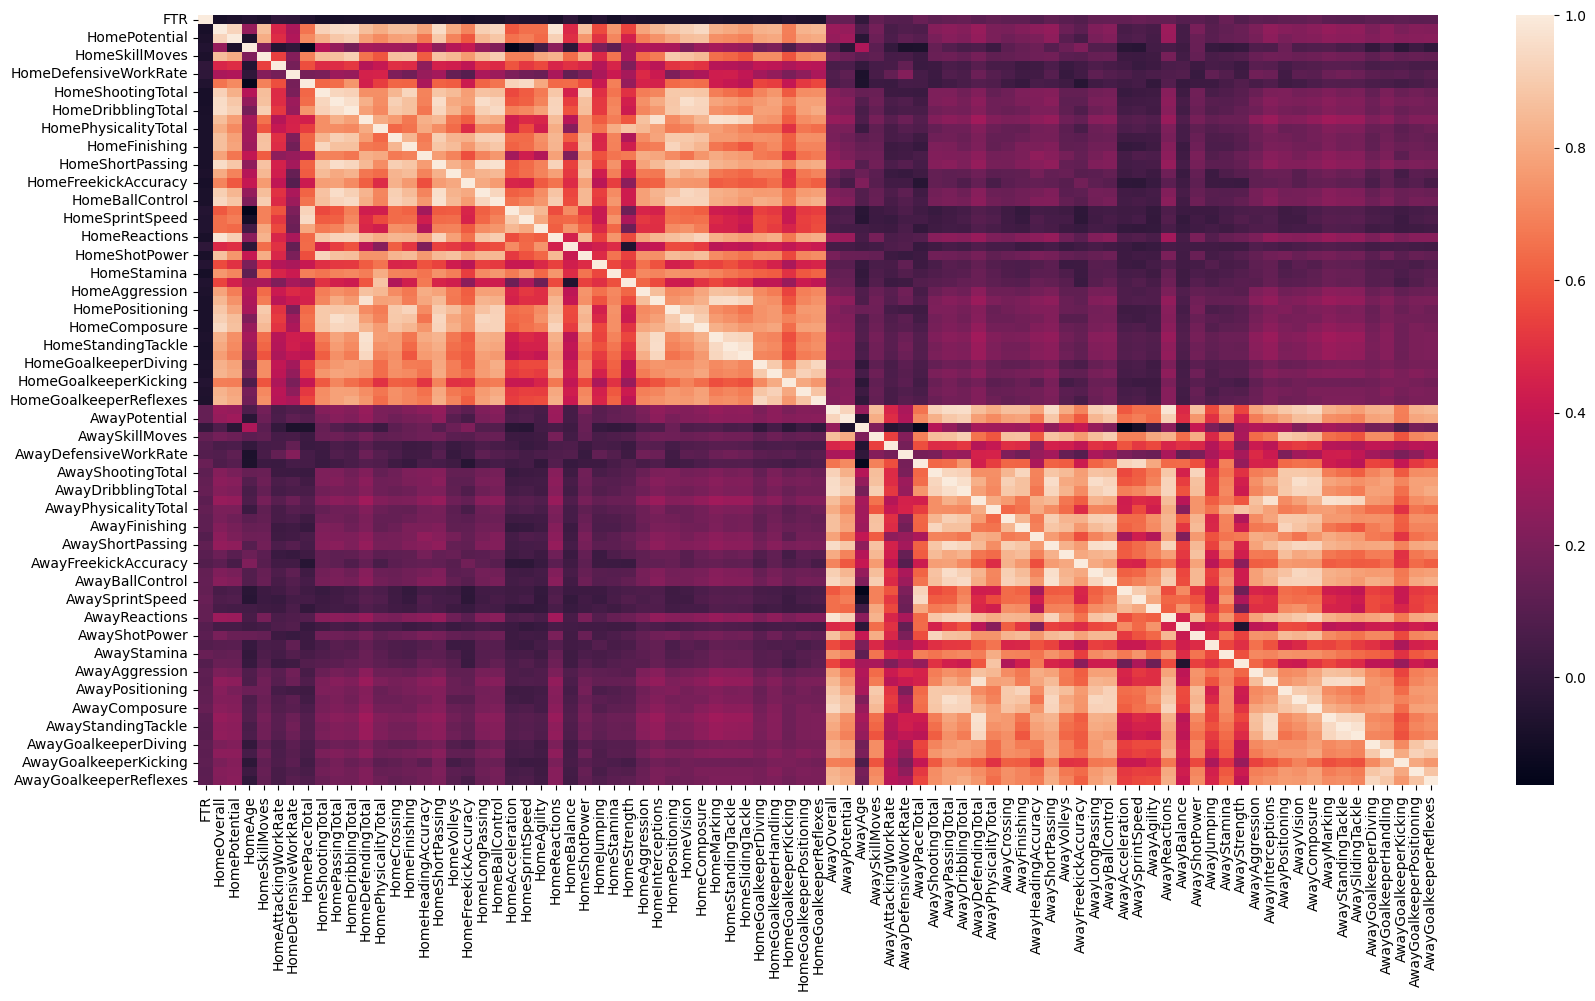

In [49]:
## Further cleaning -- > Heatmap to see which columns are most correlated with the target column
## Correlation Matrix
corr_mat = matchStats.corr(numeric_only=True)
corr_matfig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_mat)

In [50]:
matchStats.isna().sum()

FTR                          0
HomeOverall                  0
HomePotential                0
HomeAge                      0
HomeSkillMoves               0
                            ..
AwayGoalkeeperDiving         0
AwayGoalkeeperHandling       0
AwayGoalkeeperKicking        0
AwayGoalkeeperPositioning    0
AwayGoalkeeperReflexes       0
Length: 85, dtype: int64

In [51]:
## Checking what the FTR (target) looks like
matchStats['FTR'].value_counts()

1    1182
2     891
0     717
Name: FTR, dtype: int64

***
# **ML**
![](Champions-League-Predictions-2023.jpg)
***

## **Data Splitting**

In [52]:
X = matchStats.iloc[:,1:]
y = matchStats.iloc[:,0]

## **Standardization**

In [53]:
col_names = list(X.columns)
scaler = StandardScaler()
X_norm= scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=col_names) 

In [54]:
X_norm

,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,0.099563,0.127752,-0.424511,-0.372565,0.590450,1.771217,0.200842,-0.262861,0.009120,-0.134781,0.702064,0.783011,-0.061004,0.177599,-0.044378,-0.044466,0.053025,-0.414109,0.202887,0.079649,0.582177,0.239839,0.504864,-0.035375,0.286796,-0.187053,0.723101,0.263460,0.314527,1.013972,0.627238,0.194584,0.790456,0.619394,1.075901,0.758792,0.605538,0.805248,0.705593,1.495211,0.470354,0.290771,1.085066,1.576637,-1.393030,0.839450,0.801652,1.974912,0.862317,0.289784,1.283810,1.292280,0.569018,-0.160071,1.383728,0.352460,-0.178649,1.354585,0.071536,0.690853,1.066643,1.370295,1.187658,0.677487,1.033687,1.055060,0.858052,0.541206,-2.050400,0.813813,-1.223356,0.796995,0.645132,1.151363,1.714117,0.997372,0.806207,0.552607,0.852531,0.971365,1.101515,0.776236,1.229931,1.134017
1,1.654002,1.624394,0.286639,2.383884,1.189437,0.078813,1.410964,1.298716,1.627287,1.490035,1.480597,1.485582,1.671022,1.158843,1.477109,1.803031,1.681150,1.484934,1.963058,1.655645,1.522467,1.663779,1.901948,1.704662,1.281369,1.713986,1.991001,1.357554,0.879379,1.857885,1.803172,1.862938,1.825730,1.905927,1.402672,1.584434,1.162441,2.383356,2.210096,2.070392,2.265718,2.360556,0.425069,0.944844,-1.023503,0.616798,1.670650,2.813022,0.697789,0.062605,0.468029,0.577645,0.277035,0.860481,0.295283,0.618566,0.553611,1.180878,0.165678,-0.277786,1.042357,1.136732,0.976760,0.841679,0.889704,0.566042,0.354532,-0.044282,0.346777,1.849237,0.396199,1.016008,0.340951,0.897344,1.108152,0.998985,0.975932,0.273271,0.287079,0.514545,0.230486,0.488646,0.056039,0.980700
2,-0.136086,-0.196048,0.044021,0.213242,0.692531,0.759843,-0.342293,-0.262861,0.226435,0.197966,0.582384,-0.083481,0.440278,-0.723464,-0.143047,0.062468,-0.022440,0.269109,0.182037,0.135042,0.365156,-0.505486,0.223611,-0.200894,0.833440,-0.095554,0.970605,0.578490,-0.488049,-0.098635,0.412450,-0.179720,0.204292,0.239971,0.231553,0.421495,0.273179,-0.482155,-0.482173,-0.266279,-0.669012,-0.456651,-0.361838,0.552250,-1.578855,-0.552122,-0.091155,-0.895329,-0.512772,-0.943040,-0.302253,-0.436956,0.348067,-1.069567,-0.091771,-0.667104,-0.238539,-0.095642,-0.909807,0.262252,-0.124616,-0.274517,-0.124596,-0.664683,-0.796955,-0.264892,0.226866,-1.169746,0.069328,-0.920684,-1.493119,0.171504,0.113508,-0.875209,-0.186459,0.284787,0.546905,0.869276,1.023281,-0.938975,-0.561358,-0.014637,-0.496381,-0.859109
3,1.673275,1.815011,0.022498,1.417401,1.147255,1.234204,1.035857,1.144944,1.762626,1.653600,1.436984,1.074081,1.555708,1.226764,0.413171,1.821883,1.290032,1.582620,2.136918,1.718359,0.878114,0.553734,1.034018,1.622022,1.300612,1.165427,0.128209,1.506500,0.027756,1.073334,1.636

In [55]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=32)

# **K-Nearest Neighbourgh**

**Finding out what's the best number of K (hyperparameter tuning)**

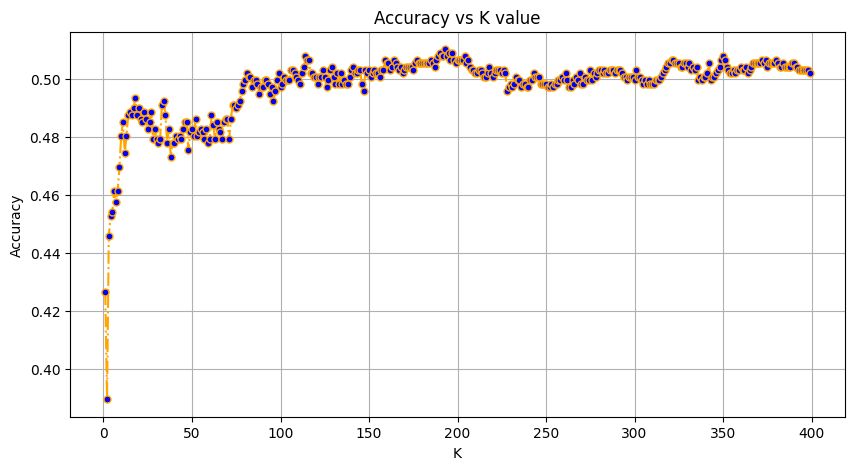

In [56]:
acc = []
for i in range(1,400):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred_knn)
    acc.append(accuracy)

plt.figure(figsize=(10,5))
plt.plot(range(1,400),acc ,color = 'orange', linestyle = 'dashdot', marker = 'o', markerfacecolor = 'blue', markersize = 5)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K value')
plt.show()

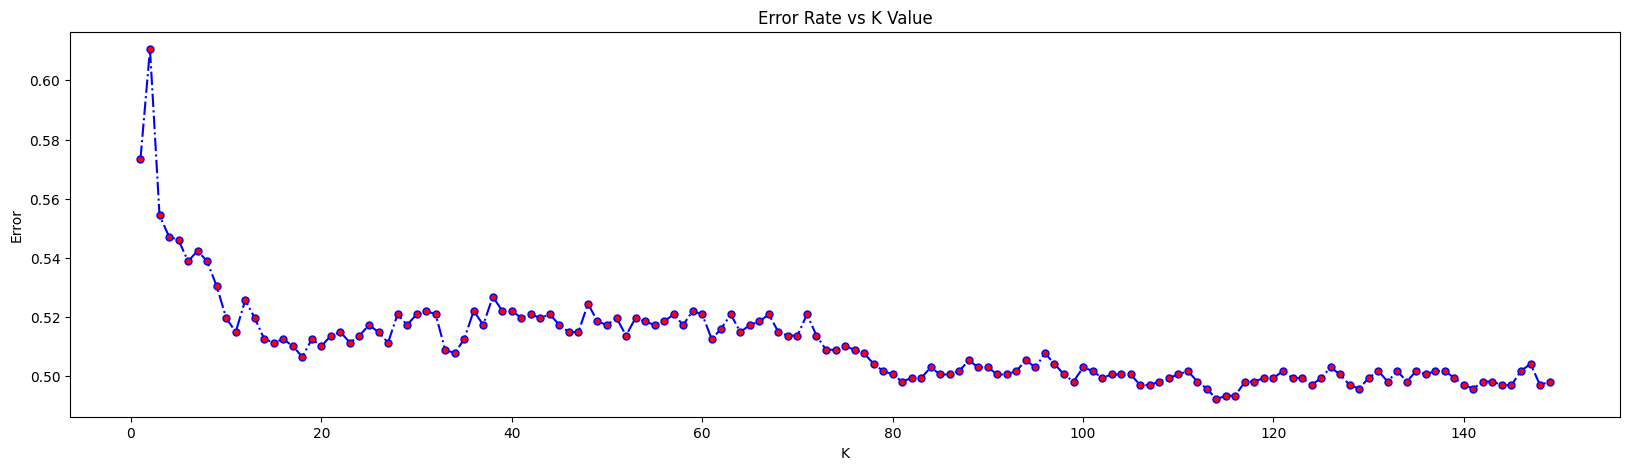

In [57]:
error = []
for i in range(1,150):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    error.append(np.mean(y_pred_knn != y_test))

plt.figure(figsize=(20,5))
plt.plot(range(1,150), error, color = 'blue', linestyle = 'dashdot', marker = 'o', markerfacecolor = 'red', markersize = 5)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

**According to the above graphs, the best k=132, because gives the minimal error and maximum accuracy score**

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=18)

#train and test
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [59]:
y_pred_knn = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)


In [60]:
accuracy_sc = accuracy_score(y_test, y_pred_knn)
print("Accruracy:", round(accuracy_sc,3))

Accruracy: 0.493


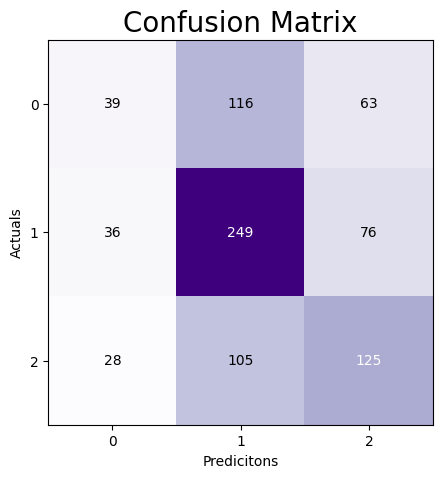

In [61]:
# Confusion Matrix
cMatrix = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat =  cMatrix, figsize = (5,5), cmap = plt.cm.Purples)
plt.xlabel('Predicitons', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

In [62]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.38      0.18      0.24       218
           1       0.53      0.69      0.60       361
           2       0.47      0.48      0.48       258

    accuracy                           0.49       837
   macro avg       0.46      0.45      0.44       837
weighted avg       0.47      0.49      0.47       837



## MultiClass ROC Curve --> OvR

In [63]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [64]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [65]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

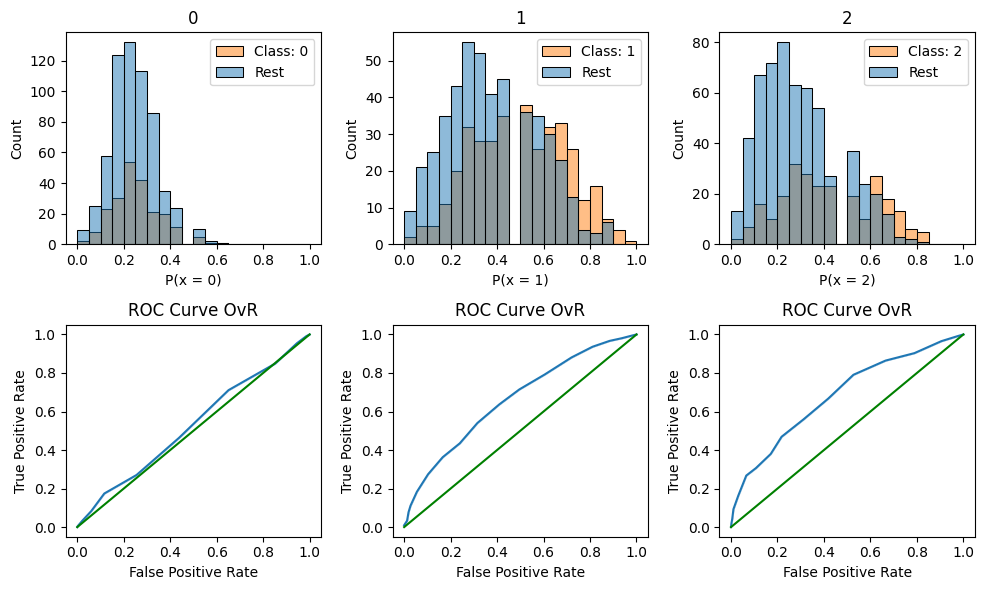

In [66]:

# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (10, 6))
bins = [i/20 for i in range(20)] + [1]
classes = knn_model.classes_
roc_auc_ovr = {}
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()


***

In [67]:
# knn = KNeighborsClassifier()
# from sklearn.model_selection import GridSearchCV
# k_range = list(range(1, 200))
# param_grid = dict(n_neighbors=k_range)


In [68]:
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
# grid

In [69]:
# grid_search=grid.fit(X_train, y_train)


In [70]:
#print(grid_search.best_params_)

In [71]:
#accuracy = grid_search.best_score_ 
#print("Accuracy for our training dataset with tuning is : {:.3f}".format(accuracy) )


In [72]:
# knn_model = KNeighborsClassifier(n_neighbors=43)

# #train and test
# knn_model.fit(X_train, y_train)

# y_pred_knn = knn_model.predict(X_test)
# y_proba = knn_model.predict_proba(X_test)

# accuracy_sc = accuracy_score(y_test, y_pred_knn)
# print("Accruracy:", round(accuracy_sc,3))

***

## Which model and corresponding parameters should I use?

In [73]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {'C': [1,5,10],
                    'kernel': ['rbf','linear','sigmoid']
                    }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {'n_estimators': [1,5,10]}
    },
    'DecisionTreeClassifier' : {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini','entropy'],
                    'random_state': [10,50,100],
                    'max_depth': [1,3,5,7],
                    'min_samples_leaf':[1,3,5,7]} 
    }
}

In [74]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(X_train, y_train)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
# df

The best model, according to the above table, would be SVM, but I think this works best with linear problem, and I think my problem does not have a linear approach. So I will use DecisionTreeClassifier model

# **ANN**

In [75]:
## Artificial Neural Network
## Initialise the NN
model = Sequential()

## set up the layers
# input layer
model.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=84)) 
# hidden layer
model.add(Dense(units=5, kernel_initializer='uniform', activation='relu')) 
# Dropout - to avoid overfitting (regularizator)
model.add(Dropout(0.2))
# Output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) 

## Compiling the ANN
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [76]:
history = model.fit(X_train, y_train, batch_size=15, epochs=100, validation_split=0.3)  ## 30% of our training data to use as validation data


Epoch 1/100


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


67/92 [====================>.........] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3861

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


92/92 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3936 - val_loss: 0.0000e+00 - val_accuracy: 0.4710
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3987 - val_loss: 0.0000e+00 - val_accuracy: 0.4710
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3987 - val_loss: 0.0000e+00 - val_accuracy: 0.4710
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3987 - val_loss: 0.0000e+00 - val_accuracy: 0.4710
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3519 - val_loss: 0.0000e+00 - val_accuracy: 0.3191
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3138 - val_loss: 0.0000e+00 - val_accuracy: 0.2799
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3131 - val_loss: 0.0

In [77]:
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')


y_pred_ann = model.predict(X_test)
pd.DataFrame(y_pred_ann, columns=['Y_Pred'])

27/27 [==============================] - 0s 1ms/step


,Y_Pred
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
832,0.0
833,1.0
834,0.0
835,0.0


In [78]:
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)
pd.DataFrame(y_pred_ann).head()

,0
0,0
1,1
2,0
3,1
4,1


In [79]:
y_test

2253    1
318     1
159     1
1537    1
2337    2
       ..
2185    1
2976    1
435     1
1867    2
2290    1
Name: FTR, Length: 837, dtype: int64

In [80]:
print(y_test.shape)
print(y_pred_ann.shape)

(837,)
(837, 1)


In [81]:
# Classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.24      0.50      0.33       218
           1       0.30      0.33      0.32       361
           2       0.00      0.00      0.00       258

    accuracy                           0.27       837
   macro avg       0.18      0.28      0.21       837
weighted avg       0.19      0.27      0.22       837



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

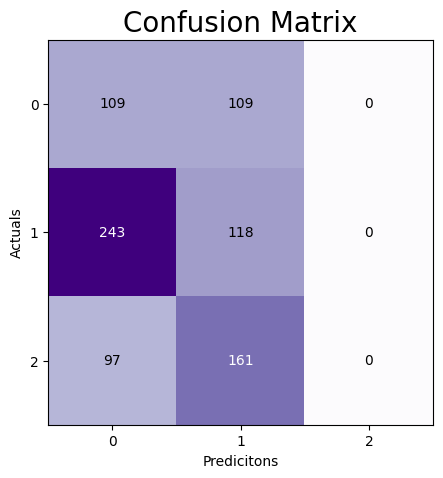

In [82]:
# Confusion Matrix
cMatrix = confusion_matrix(y_test, y_pred_ann)
fig, ax = plot_confusion_matrix(conf_mat =  cMatrix, figsize = (5,5), cmap = plt.cm.Purples)
plt.xlabel('Predicitons', fontsize = 10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

***
I need to bring 2022/2023 Champions League groups
***

In [83]:
cl = pd.read_excel('CLGroups.xlsx')
table1=pd.merge(cl, HomeStats,'left', left_on='HomeTeam',right_on='HomeClubName')
clmatches=pd.merge(table1, AwayStats,'left',left_on='AwayTeam',right_on='AwayClubName')
clmatches

,Group,HomeTeam,AwayTeam,HomeClubName,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayClubName,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,A,Ajax,Rangers FC,Ajax,74.370370,81.259259,23.629630,2.814815,1.296296,1.148148,72.444444,60.851852,68.222222,72.666667,58.666667,71.259259,61.185185,55.370370,59.851852,71.000000,53.518519,48.925926,66.148148,71.111111,69.666667,70.629630,67.740741,71.148148,67.555556,66.074074,66.074074,70.074074,71.555556,64.444444,56.185185,61.481481,66.111111,71.962963,57.037037,56.888889,53.259259,71.000000,70.000000,70.500000,75.000000,73.000000,Rangers FC,70.740741,75.629630,26.333333,2.592593,1.407407,1.074074,71.370370,61.814815,64.629630,68.703704,52.888889,67.666667,55.222222,55.370370,56.111111,64.703704,49.222222,49.074074,59.962963,64.074074,67.703704,68.592593,69.518519,66.962963,69.962963,64.777778,67.777778,67.777778,65.592593,63.000000,48.370370,57.000000,62.296296,65.074074,49.703704,50.592593,47.703704,68.333333,69.000000,67.333333,68.666667,69.000000
1,A,Napoli,Liverpool,Napoli,77.240000,81.000000,25.640000,2.880000,1.280000,1.040000,75.480000,62.320000,67.960000,74.920000,59.880000,70.400000,60.200000,55.000000,58.880000,69.880000,50.960000,49.720000,63.160000,71.640000,72.440000,73.200000,72.520000,74.640000,70.440000,66.840000,70.320000,70.200000,67.360000,66.400000,57.000000,62.160000,63.680000,71.320000,57.400000,58.800000,53.760000,77.000000,73.000000,71.500000,78.000000,78.000000,Liverpool,78.666667,83.600000,25.666667,3.033333,1.466667,1.400000,73.966667,63.700000,71.866667,76.066667,62.966667,71.466667,62.866667,54.400000,57.533333,72.433333,51.500000,52.166667,68.933333,71.833333,71.166667,70.733333,71.033333,77.133333,70.300000,68.500000,67.600000,71.100000,68.533333,66.833333,60.633333,61.900000,68.633333,75.266667,58.766667,62.066667,57.166667,77.000000,75.333333,75.333333,76.333333,79.666667
2,A,Liverpool,Ajax,Liverpool,78.666667,83.600000,25.666667,3.033333,1.466667,1.400000,73.966667,63.700000,71.866667,76.066667,62.966667,71.466667,62.866667,54.400000,57.533333,72.433333,51.500000,52.166667,68.933333,71.833333,71.166667,70.733333,71.033333,77.133333,70.300000,68.500000,67.600000,71.100000,68.533333,66.833333,60.633333,61.900000,68.633333,75.266667,58.766667,62.066667,57.166667,77.000000,75.333333,75.333333,76.333333,79.666667,Ajax,74.370370,81.259259,23.629630,2.814815,1.296296,1.148148,72.444444,60.851852,68.222222,72.666667,58.666667,71.259259,61.185185,55.370370,59.851852,71.000000,53.518519,48.925926,66.148148,71.111111,69.666667,70.629630,67.740741,71.148148,67.555556,66.074074,66.074074,70.074074,71.555556,64.444444,56.185185,61.481481,66.111111,71.962963,57.037037,56.888889,53.259259,71.000000

In [84]:
clmatches=clmatches.drop(['HomeClubName','AwayClubName'],axis=1)


In [85]:
scaler.fit(clmatches.iloc[:,3:])
scaled_feat=scaler.transform(clmatches.iloc[:,3:])
Xcl=pd.DataFrame(scaled_feat,columns = list(clmatches.iloc[:,3:].columns))

predcl=knn_model.predict(Xcl)

In [86]:
clmatches['Results']=predcl
clresults=clmatches[['Group','HomeTeam','AwayTeam','Results']]
clresults['Homepts']=0
clresults['Awaypts']=0
clresults['Homepts'][clresults['Results']==1]=3
clresults['Awaypts'][clresults['Results']==2]=3
clresults['Homepts'][clresults['Results']==0]=1
clresults['Awaypts'][clresults['Results']==0]=1
clresults
# #clresults[clresults['Group']=='A']


C:\Users\User\AppData\Local\Temp\ipykernel_17056\2811382480.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Homepts']=0
C:\Users\User\AppData\Local\Temp\ipykernel_17056\2811382480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clresults['Awaypts']=0
C:\Users\User\AppData\Local\Temp\ipykernel_17056\2811382480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,Group,HomeTeam,AwayTeam,Results,Homepts,Awaypts
0,A,Ajax,Rangers FC,1,3,0
1,A,Napoli,Liverpool,0,1,1
2,A,Liverpool,Ajax,1,3,0
3,A,Rangers FC,Napoli,2,0,3
4,A,Ajax,Napoli,1,3,0
...,...,...,...,...,...,...
79,H,Paris Saint-Germain,Juventus,1,3,0
80,H,Juventus,SL Benfica,1,3,0
81,H,Paris Saint-Germain,SL Benfica,1,3,0
82,H,SL Benfica,Juventus,1,3,0


In [87]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
hpts = clresults[['Group','HomeTeam','Homepts']].groupby(['Group','HomeTeam']).sum().reset_index()
apts = clresults[['Group','AwayTeam','Awaypts']].groupby(['Group','AwayTeam']).sum().reset_index()


In [88]:
clpred = pd.concat([hpts, apts], axis=1)
clpred['Totalpts'] = clpred['Homepts'] + clpred['Awaypts']
clpred.drop(['Homepts','AwayTeam','Awaypts'],axis= 1, inplace=True)
clpred = clpred.loc[:,~clpred.columns.duplicated()]
clpred = clpred.groupby(['Group','HomeTeam']).sum()
#clpred.sort_values(['Group','Totalpts'],ascending=False).groupby('Group')
clpred.sort_values(['Group','Totalpts'], ascending=False)

Totalpts
Group HomeTeam                        
H     Paris Saint-Germain           12
      Juventus                       3
      SL Benfica                     3
G     Manchester City               12
      Borussia Dortmund              3
      Sevilla FC                     3
F     RB Leipzig                    13
      Real Madrid CF                12
      Celtic                        10
      Shakhtar Donetsk               0
E     AC Milan                      18
      Chelsea                       12
      Dinamo Zagreb                  3
      FC Red Bull Salzburg           3
D     Sporting CP                   15
      Tottenham Hotspur             15
      Eintracht Frankfurt            4
      Olympique de Marseille         1
C     FC Bayern München             15
      Inter                         15
      FC Barcelona                   6
      FC Viktoria Plzeň              0
B     Atlético de Madrid            13
      Club Brugge KV                10
      Bayer 04 Leverkusen            7
      FC Porto                       4
A     Liverpool                     16
      Napoli                        10
      Ajax                           9
      Rangers FC                     0

In [89]:
cl_groups = clpred.sort_values(['Group','Totalpts'],ascending=False).groupby('Group').head(2)
cl_groups

Totalpts
Group HomeTeam                     
H     Paris Saint-Germain        12
      Juventus                    3
G     Manchester City            12
      Borussia Dortmund           3
F     RB Leipzig                 13
      Real Madrid CF             12
E     AC Milan                   18
      Chelsea                    12
D     Sporting CP                15
      Tottenham Hotspur          15
C     FC Bayern München          15
      Inter                      15
B     Atlético de Madrid         13
      Club Brugge KV             10
A     Liverpool                  16
      Napoli                     10

***
## **Knock out**

In [90]:
#cl_groups.reset_index()
first = cl_groups.groupby('Group').head(1).reset_index()
first = first[["HomeTeam"]]
first.rename(columns={'HomeTeam':'First'}, inplace=True)
first

,First
0,Paris Saint-Germain
1,Manchester City
2,RB Leipzig
3,AC Milan
4,Sporting CP
5,FC Bayern München
6,Atlético de Madrid
7,Liverpool


In [91]:
second = cl_groups.sort_values(['Group','Totalpts','HomeTeam'],ascending=[True,True,False]).groupby('Group').head(1).reset_index()
second = second[["HomeTeam"]]
second.rename(columns={'HomeTeam':'Second'}, inplace=True)
second


,Second
0,Napoli
1,Club Brugge KV
2,Inter
3,Tottenham Hotspur
4,Chelsea
5,Real Madrid CF
6,Borussia Dortmund
7,Juventus


In [92]:
# Shuffling the order
second = second.reindex(np.random.permutation(second.index))
second = second.reset_index().iloc[:,1:]
second

,Second
0,Napoli
1,Juventus
2,Borussia Dortmund
3,Inter
4,Tottenham Hotspur
5,Chelsea
6,Real Madrid CF
7,Club Brugge KV


In [93]:
roundof16matches = pd.concat([first,second],axis=1).sort_index()
roundof16matches


,First,Second
0,Paris Saint-Germain,Napoli
1,Manchester City,Juventus
2,RB Leipzig,Borussia Dortmund
3,AC Milan,Inter
4,Sporting CP,Tottenham Hotspur
5,FC Bayern München,Chelsea
6,Atlético de Madrid,Real Madrid CF
7,Liverpool,Club Brugge KV


*** 
# **ML Binary Classification Problem**
because for knock out rounds I need just Win and Loss (0,1)

In [94]:
binary = matchStats.query('FTR!=0')
binary

,FTR,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,1,71.032258,76.741935,24.258065,2.483871,1.354839,1.354839,70.419355,57.000000,63.064516,67.612903,56.870968,69.096774,53.612903,50.290323,54.774194,63.806452,46.612903,44.451613,59.193548,63.967742,67.838710,67.064516,66.709677,66.741935,65.483871,62.064516,67.741935,65.129032,67.290323,63.032258,53.161290,54.806452,62.580645,66.612903,54.838710,55.129032,51.741935,72.666667,70.000000,72.666667,70.000000,72.000000,74.931034,82.448276,23.000000,2.724138,1.379310,1.379310,72.310345,59.241379,68.551724,73.275862,56.310345,66.379310,59.724138,51.000000,54.310345,69.827586,46.689655,48.896552,63.068966,69.379310,69.620690,68.413793,68.482759,72.068966,67.137931,65.000000,59.620690,67.000000,62.965517,62.206897,53.241379,58.827586,67.172414,68.551724,53.655172,54.275862,52.689655,73.333333,71.666667,69.333333,73.666667,75.666667
1,1,77.181818,82.636364,25.181818,3.030303,1.424242,1.151515,73.878788,63.333333,70.030303,74.060606,60.151515,71.121212,60.939394,54.272727,60.030303,71.757576,53.363636,52.090909,67.090909,70.575758,70.606061,71.454545,71.393939,75.242424,68.363636,69.727273,71.454545,68.848485,68.878788,66.242424,58.424242,61.818182,67.727273,73.212121,56.272727,58.545455,53.878788,79.000000,76.333333,75.333333,78.666667,81.000000,72.320000,79.960000,23.480000,2.680000,1.480000,1.480000,71.840000,58.320000,65.040000,70.440000,55.080000,69.320000,55.120000,52.080000,56.840000,69.080000,47.080000,45.000000,62.960000,68.400000,69.000000,68.920000,68.000000,69.680000,65.680000,62.640000,66.640000,70.520000,67.520000,63.040000,51.880000,57.760000,64.160000,68.560000,54.400000,53.120000,50.520000,71.500000,68.000000,68.000000,68.000000,75.000000
2,2,70.100000,75.466667,24.866667,2.600000,1.366667,1.233333,68.866667,57.000000,64.000000,68.933333,56.366667,66.600000,55.733333,46.633333,54.433333,64.266667,46.300000,47.200000,59.100000,64.200000,67.200000,64.766667,65.766667,65.933333,67.066667,62.433333,68.466667,66.200000,65.033333,58.800000,52.200000,53.233333,59.666667,64.666667,51.133333,53.733333,50.466667,67.500000,65.000000,64.500000,64.500000,68.750000,69.206897,78.413793,22.758621,2.448276,1.275862,1.034483,68.379310,54.241379,61.724138,66.413793,55.379310,63.758621,53.482759,46.862069,54.103448,63.586207,42.620690,47.172414,57.724138,62.482759,65.758621,64.275862,62.344828,65.620690,65.310345,58.103448,65.827586,61.103448,62.206897,59.827586,50.862069,50.310345,57.724138,64.896552,52.517241,55.586207,53.344828,65.666667,64.666667,65.666667,65.333333,67.000000
3,1,77.258065,83.387097,24.838710,2.838710,1.419355,1.290323,72.806452,62.709677,70.612903,74.709677,

In [95]:
map_FTR = {1:0, 2:1}
binary['FTR'] = binary['FTR'].map(map_FTR)
binary

C:\Users\User\AppData\Local\Temp\ipykernel_17056\1903730983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary['FTR'] = binary['FTR'].map(map_FTR)


,FTR,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,0,71.032258,76.741935,24.258065,2.483871,1.354839,1.354839,70.419355,57.000000,63.064516,67.612903,56.870968,69.096774,53.612903,50.290323,54.774194,63.806452,46.612903,44.451613,59.193548,63.967742,67.838710,67.064516,66.709677,66.741935,65.483871,62.064516,67.741935,65.129032,67.290323,63.032258,53.161290,54.806452,62.580645,66.612903,54.838710,55.129032,51.741935,72.666667,70.000000,72.666667,70.000000,72.000000,74.931034,82.448276,23.000000,2.724138,1.379310,1.379310,72.310345,59.241379,68.551724,73.275862,56.310345,66.379310,59.724138,51.000000,54.310345,69.827586,46.689655,48.896552,63.068966,69.379310,69.620690,68.413793,68.482759,72.068966,67.137931,65.000000,59.620690,67.000000,62.965517,62.206897,53.241379,58.827586,67.172414,68.551724,53.655172,54.275862,52.689655,73.333333,71.666667,69.333333,73.666667,75.666667
1,0,77.181818,82.636364,25.181818,3.030303,1.424242,1.151515,73.878788,63.333333,70.030303,74.060606,60.151515,71.121212,60.939394,54.272727,60.030303,71.757576,53.363636,52.090909,67.090909,70.575758,70.606061,71.454545,71.393939,75.242424,68.363636,69.727273,71.454545,68.848485,68.878788,66.242424,58.424242,61.818182,67.727273,73.212121,56.272727,58.545455,53.878788,79.000000,76.333333,75.333333,78.666667,81.000000,72.320000,79.960000,23.480000,2.680000,1.480000,1.480000,71.840000,58.320000,65.040000,70.440000,55.080000,69.320000,55.120000,52.080000,56.840000,69.080000,47.080000,45.000000,62.960000,68.400000,69.000000,68.920000,68.000000,69.680000,65.680000,62.640000,66.640000,70.520000,67.520000,63.040000,51.880000,57.760000,64.160000,68.560000,54.400000,53.120000,50.520000,71.500000,68.000000,68.000000,68.000000,75.000000
2,1,70.100000,75.466667,24.866667,2.600000,1.366667,1.233333,68.866667,57.000000,64.000000,68.933333,56.366667,66.600000,55.733333,46.633333,54.433333,64.266667,46.300000,47.200000,59.100000,64.200000,67.200000,64.766667,65.766667,65.933333,67.066667,62.433333,68.466667,66.200000,65.033333,58.800000,52.200000,53.233333,59.666667,64.666667,51.133333,53.733333,50.466667,67.500000,65.000000,64.500000,64.500000,68.750000,69.206897,78.413793,22.758621,2.448276,1.275862,1.034483,68.379310,54.241379,61.724138,66.413793,55.379310,63.758621,53.482759,46.862069,54.103448,63.586207,42.620690,47.172414,57.724138,62.482759,65.758621,64.275862,62.344828,65.620690,65.310345,58.103448,65.827586,61.103448,62.206897,59.827586,50.862069,50.310345,57.724138,64.896552,52.517241,55.586207,53.344828,65.666667,64.666667,65.666667,65.333333,67.000000
3,0,77.258065,83.387097,24.838710,2.838710,1.419355,1.290323,72.806452,62.709677,70.612903,74.709677,

In [96]:
X = binary.iloc[:,1:]
y = binary.iloc[:,0]

col_names = list(X.columns)
scaler = StandardScaler()
X_norm= scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=col_names) 

## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=32)

## Logistic Regression

In [97]:
## Train the logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
accuracy_LR = accuracy_score(y_test, pred_LR)
print("Accuracy:", round(accuracy_LR,3))

Accuracy: 0.68


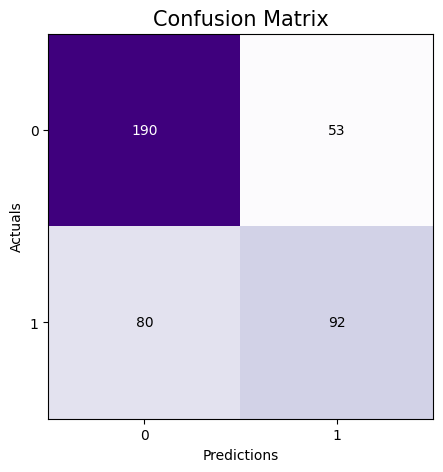

In [99]:
# Plotting a confusion matrix
cm = confusion_matrix(y_test, pred_LR)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5), cmap = plt.cm.Purples)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [100]:
print(classification_report(y_test, pred_LR),'\n')
auc = roc_auc_score(y_test, pred_LR)
print('AUC: %f' %auc)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       243
           1       0.63      0.53      0.58       172

    accuracy                           0.68       415
   macro avg       0.67      0.66      0.66       415
weighted avg       0.68      0.68      0.67       415
 

AUC: 0.658388


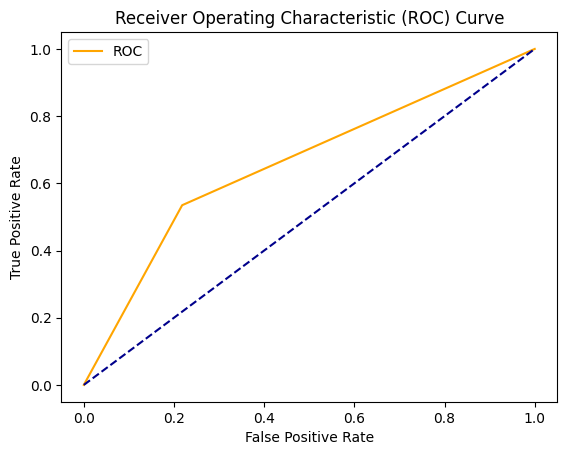

In [101]:
fpr, tpr = roc_curve(y_test, pred_LR)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## I can now apply this new binary model (LR) to the knock out matches

In [102]:
table1=pd.merge(roundof16matches, HomeStats,'left', left_on='First',right_on='HomeClubName')
rounfof16total=pd.merge(table1, AwayStats,'left',left_on='Second',right_on='AwayClubName')

rounfof16total

,First,Second,HomeClubName,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayClubName,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,Paris Saint-Germain,Napoli,Paris Saint-Germain,79.807692,84.230769,25.807692,3.038462,1.384615,1.192308,76.076923,67.500000,73.153846,78.500000,60.384615,70.307692,60.923077,55.846154,57.346154,71.115385,51.153846,51.807692,66.461538,70.807692,71.615385,70.461538,71.961538,77.384615,68.576923,70.615385,68.269231,66.961538,67.769231,61.769231,57.307692,62.692308,70.461538,75.192308,54.230769,56.384615,52.346154,80.750000,76.500000,72.250000,77.500000,82.500000,Napoli,77.240000,81.000000,25.640000,2.880000,1.280000,1.040000,75.480000,62.320000,67.960000,74.920000,59.880000,70.400000,60.200000,55.000000,58.880000,69.880000,50.960000,49.720000,63.160000,71.640000,72.440000,73.200000,72.520000,74.640000,70.440000,66.840000,70.320000,70.200000,67.360000,66.400000,57.000000,62.160000,63.680000,71.320000,57.400000,58.800000,53.760000,77.000000,73.000000,71.500000,78.000000,78.000000
1,Manchester City,Juventus,Manchester City,78.518519,84.185185,25.370370,2.925926,1.518519,1.333333,73.629630,65.259259,72.148148,76.296296,62.259259,70.703704,61.777778,56.481481,56.518519,72.037037,52.740741,56.555556,67.407407,72.185185,71.037037,70.592593,70.185185,76.370370,71.703704,71.148148,66.407407,69.851852,68.407407,64.962963,58.518519,61.222222,69.296296,72.925926,59.259259,60.185185,55.777778,75.333333,73.666667,80.333333,79.000000,78.666667,Juventus,77.354839,82.451613,25.838710,2.870968,1.354839,1.193548,73.677419,66.483871,68.387097,75.129032,58.161290,71.645161,57.322581,55.032258,60.000000,68.612903,57.451613,53.161290,63.903226,69.483871,68.354839,70.645161,67.516129,73.064516,64.548387,71.419355,70.806452,68.290323,70.483871,61.967742,52.032258,57.483871,62.161290,72.096774,53.129032,54.774194,52.967742,76.000000,74.000000,66.000000,74.250000,77.250000
2,RB Leipzig,Borussia Dortmund,RB Leipzig,77.708333,81.916667,25.125000,2.833333,1.375000,1.166667,74.541667,63.583333,70.041667,75.625000,59.041667,70.708333,61.958333,55.083333,58.333333,70.833333,52.416667,48.208333,62.958333,70.041667,70.250000,70.125000,68.375000,76.041667,66.875000,66.500000,71.166667,70.708333,68.333333,63.291667,59.041667,60.750000,66.541667,70.708333,55.708333,55.625000,51.916667,72.666667,70.333333,66.333333,70.000000,74.333333,Borussia Dortmund,74.529412,82.058824,23.764706,3.029412,1.470588,1.147059,74.441176,63.176471,67.058824,73.529412,54.735294,70.382353,56.852941,55.058824,55.117647,67.941176,53.764706,46.794118,61.088235,67.500000,69.676471,70.588235,70.000000,72.117647,68.676471,67.294118,68.941176,66.000000,72.441176,59.323529,52.205882,58.647059,64.088235,

In [103]:
rounfof16total=rounfof16total.drop(['HomeClubName','AwayClubName'],axis=1)

## Standard Scaler
scaler.fit(rounfof16total.iloc[:,2:])
scaled_feat1=scaler.transform(rounfof16total.iloc[:,2:])
Xcl=pd.DataFrame(scaled_feat1,columns = list(rounfof16total.iloc[:,2:].columns))
Xcl



,HomeOverall,HomePotential,HomeAge,HomeSkillMoves,HomeAttackingWorkRate,HomeDefensiveWorkRate,HomePaceTotal,HomeShootingTotal,HomePassingTotal,HomeDribblingTotal,HomeDefendingTotal,HomePhysicalityTotal,HomeCrossing,HomeFinishing,HomeHeadingAccuracy,HomeShortPassing,HomeVolleys,HomeFreekickAccuracy,HomeLongPassing,HomeBallControl,HomeAcceleration,HomeSprintSpeed,HomeAgility,HomeReactions,HomeBalance,HomeShotPower,HomeJumping,HomeStamina,HomeStrength,HomeAggression,HomeInterceptions,HomePositioning,HomeVision,HomeComposure,HomeMarking,HomeStandingTackle,HomeSlidingTackle,HomeGoalkeeperDiving,HomeGoalkeeperHandling,HomeGoalkeeperKicking,HomeGoalkeeperPositioning,HomeGoalkeeperReflexes,AwayOverall,AwayPotential,AwayAge,AwaySkillMoves,AwayAttackingWorkRate,AwayDefensiveWorkRate,AwayPaceTotal,AwayShootingTotal,AwayPassingTotal,AwayDribblingTotal,AwayDefendingTotal,AwayPhysicalityTotal,AwayCrossing,AwayFinishing,AwayHeadingAccuracy,AwayShortPassing,AwayVolleys,AwayFreekickAccuracy,AwayLongPassing,AwayBallControl,AwayAcceleration,AwaySprintSpeed,AwayAgility,AwayReactions,AwayBalance,AwayShotPower,AwayJumping,AwayStamina,AwayStrength,AwayAggression,AwayInterceptions,AwayPositioning,AwayVision,AwayComposure,AwayMarking,AwayStandingTackle,AwaySlidingTackle,AwayGoalkeeperDiving,AwayGoalkeeperHandling,AwayGoalkeeperKicking,AwayGoalkeeperPositioning,AwayGoalkeeperReflexes
0,0.976762,0.966582,0.838873,1.234543,-0.315445,-0.268445,0.874797,1.120606,0.994474,1.311765,0.191683,-0.382941,0.058907,-0.140611,-0.480419,-0.031442,-0.794015,0.217061,0.356167,0.158071,0.493572,-0.271704,1.150901,0.725285,0.116974,0.675032,-0.103303,-1.322602,-0.750937,-0.959070,0.091956,0.926146,1.351443,1.308279,-0.652292,-0.394226,-0.658674,1.984142,1.356122,-0.046260,0.740766,1.553752,0.386646,-0.657770,0.344205,0.457512,-1.021929,-1.974688,1.352049,-0.369522,-0.116969,0.568578,0.169601,-0.323232,0.617614,0.781084,-0.000872,0.212931,-0.474019,-0.104122,-0.374007,1.401861,2.421982,1.764775,2.185903,0.347856,1.647058,-0.402737,0.742842,0.606861,-0.655622,0.754139,0.227339,1.917788,-0.195646,0.163524,0.365678,0.359738,-0.311743,0.678618,0.149714,0.498843,0.936502,0.395725
1,0.380336,0.933702,0.212952,0.232756,1.321018,1.036999,-0.486656,0.127040,0.593279,0.376883,1.001305,-0.145968,0.329475,0.221423,-0.792402,0.459723,0.046770,1.807604,0.787092,0.897938,0.151678,-0.171238,-0.061548,0.313441,1.414948,0.872757,-0.709608,0.419407,-0.390397,0.358196,0.571006,0.072081,0.840484,0.290173,1.499968,1.001521,0.917683,0.158029,0.224634,1.948052,1.198578,0.432613,0.440011,0.278318,0.513984,0.381585,-0.122291,-0.328494,-0.272264,1.591575,0.061163,0.680388,-0.279370,0.341843,-0.651541,0.822748,0.347944,-0.546394,2.034880,1.570600,-0.098169,0.024852,-0.906654,-0.019611,-0.564817,-0.186773,-1.050645,2.271114,1.015023,-0.406066,0.403422,-0.500716,-0.965381,-1.110803,-0.852978,0.403810,-0.667398,-0.632479,-0.534559,0.299855,0.466289,-0.749447,-0.128377,0.138110
2,0.005510,-0.702594,-0.138236,-0.591498,-0.432957,-0.505799,0.020719,-0.616082,-0.247043,0.092098,-0.388311,-0.143197,0.386633,-0.575295,-0.108295,-0.181752,-0.124934,-0.988731,-1.239846,-0.253370,-0.313584,-0.529695,-1.297090,0.179968,-0.589520,-0.852313,0.840252,0.935614,-0.432245,-0.331136,0.777984,-0.202263,-0.367422,-0.706016,-0.019875,-0.673193,-0.855964,-0.740981,-1.106529,-1.506014,-1.548296,-0.834761,-0.872953,0.025024,-1.258063,1.713503,1.269138,-0.826909,0.415960,0.033858,-0.492829,-0.175240,-1.174330,-0.332658,-0.858687,0.857060,-1.172630,-0.948935,0.609953,-1.528018,-1.142913,-1.242145,0.170227,-0.059370,0.800613,-0.508086,0.839558,-0.137581,-0.028640,-1.620894,1.066981,-1.249343,-0.923695,-0.357440,-0.018953,-1.081836,-1.097005,-1.250977,-0.657836,-1.972728,-1.195732,-0.692706,-1.051273,-1.321708
3,-0.177619,-0.371996,0.532666,-0.220584,1.094699,0.265600,-0.489232,0.261500,-0.263665,-0.438192,0.389974,1.078536,0.201970,0.944273,1.462358,0.473293,1.310025,1.056176,-0.110371,0.378854,-0.221216,0.212951,0.345295,0.18

In [104]:
predcl=model_LR.predict(Xcl)

In [105]:
rounfof16total['Results']=predcl
rounfof16total=rounfof16total[['First','Second','Results']]
rounfof16total

,First,Second,Results
0,Paris Saint-Germain,Napoli,0
1,Manchester City,Juventus,0
2,RB Leipzig,Borussia Dortmund,1
3,AC Milan,Inter,1
4,Sporting CP,Tottenham Hotspur,1
5,FC Bayern München,Chelsea,0
6,Atlético de Madrid,Real Madrid CF,1
7,Liverpool,Club Brugge KV,0


In [106]:
rounfof16total['quarterfinal'] = 0
rounfof16total['quarterfinal'][rounfof16total['Results']==0]=rounfof16total.loc[:,'First'].values
rounfof16total['quarterfinal'][rounfof16total['Results']==1]=rounfof16total.loc[:,'Second'].values

quarterfinal = rounfof16total[['quarterfinal']]
quarterfinal

C:\Users\User\AppData\Local\Temp\ipykernel_17056\3972922664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rounfof16total['quarterfinal'][rounfof16total['Results']==0]=rounfof16total.loc[:,'First'].values


,quarterfinal
0,Paris Saint-Germain
1,Manchester City
2,Borussia Dortmund
3,Inter
4,Tottenham Hotspur
5,FC Bayern München
6,Real Madrid CF
7,Liverpool


In [107]:
second = quarterfinal.iloc[1::2].reset_index().iloc[:,1:]
first = quarterfinal.iloc[::2].reset_index().iloc[:,1:]
print(first)
print(second)



          quarterfinal
0  Paris Saint-Germain
1    Borussia Dortmund
2    Tottenham Hotspur
3       Real Madrid CF
        quarterfinal
0    Manchester City
1              Inter
2  FC Bayern München
3          Liverpool


In [108]:
quarterfinal = pd.concat([first,second],axis=1)
quarterfinal.set_axis(['First','Second'], axis=1, inplace=True)
quarterfinal.merge()

C:\Users\User\AppData\Local\Temp\ipykernel_17056\3129796417.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  quarterfinal.set_axis(['First','Second'], axis=1, inplace=True)


TypeError: DataFrame.merge() missing 1 required positional argument: 'right'